This Python Notebook is a part of paper "Creating maps by Artificial Intelligence - Case study on choropleth maps by ChatGPT-4"

---------------------------------------------------------------------------------------------------------------------------------------------------------------
Advanced prompt pattern for static map (5th session)

**DESCRIPTION**

The following code snippets were generated by ChatGPT-4 for creating a choropleth map of Burned areas in Portugal. This aims to examine then capability of AI in creating maps.
Each markdown is derievd from conversation interacted between author and ChatGPT-4. The markdown has specified the assessment of the code output if it "worked" or "failed" based on prompt requirements.
The last code block is the final output or the end of the prompt conversation. The final map will be exported as a .png file. See all prompts from the following chat's history >>>https://chat.openai.com/share/5ef52675-f0bd-4efe-ac36-b55b504a65fc<<<

**HOW TO USE**
1. Change the file path according to data's location on your computer.
2. Execute each script block
3. If the script raises an error, please skip it and run the next blocks to see the solved result. If the markdown indicates 'work' following by map element(s), it means the element(s) can be generated by specified prompt.

------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Prompt pattern: Cognitive verifier**

**When I ask you a question, generate three additional questions that would help you give a more accurate answer. When I have answered the three questions, combine the answers to produce the final answers to my original question.**

**From the given zip file, it consists of 2 shapefiles; 1. state boundary of Portugal named "boundary", and 2. mainlandburn represents the average burned area from 2002-2022shapefile each region in Portugal. Can you create a choropleth map of Average burned areas in each region, 2002-2022. The map should be created from Geopandas library mainly and give me a code to run in a local environment.**

1.What specific attribute in the "mainlandburn" shapefile represents the average burned area that should be visualized in the choropleth map?

2.Is there a specific color scheme or range of values you'd prefer for visualizing the average burned areas on the map?

3.Do you need any additional information or labels on the map, such as region names or specific data points highlighted?

1. column "Burned_Are" 2. warm graduated color 3. labelling the region names

FAILED map/labels

AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

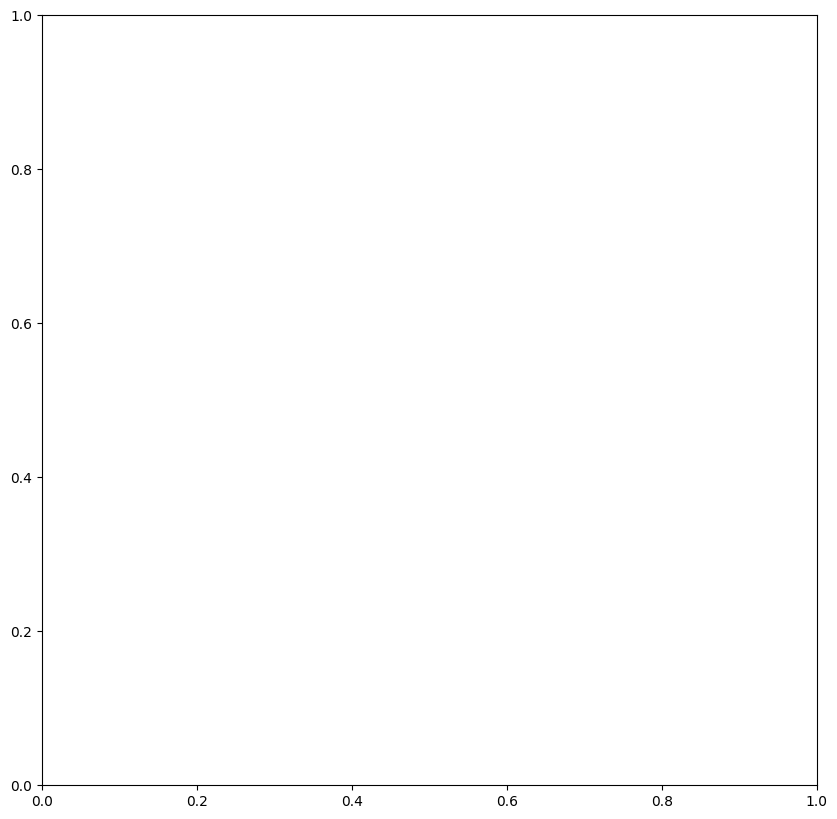

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefiles
boundary_path = '/content/boundary.shp'  # Update this path
mainlandburn_path = '/content/mainlandburn.shp'  # Update this path

boundary = gpd.read_file(boundary_path)
mainlandburn = gpd.read_file(mainlandburn_path)

# Ensuring both GeoDataFrames use the same coordinate system
mainlandburn = mainlandburn.to_crs(boundary.crs)

# Merging the boundary and mainlandburn GeoDataFrames on the region column
map_df = boundary.merge(mainlandburn, on="NAME_1")

# Creating the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
map_df.plot(column='Burned_Are', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adding labels to the regions
for idx, row in map_df.iterrows():
    plt.annotate(text=row['region'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
ax.set_axis_off()
plt.show()


**it does not work, do not merge the geodataframe. Ask me 3 additional questions**

1.Can you specify the exact names of the columns used to identify regions in both the "boundary" and "mainlandburn" shapefiles? It's important these match or are compatible for the merge to work.

2.Does the "mainlandburn" shapefile contain multiple entries per region (e.g., yearly data) that need to be averaged, or is the "Burned_Are" column already representing the average burned area for 2002-2022?

3.Are there any specific errors you encountered when attempting the merge, or did the script fail to produce a map without errors? This can help identify if the issue is with data compatibility, missing data, or perhaps a different technical problem.

1. do not merge the data 2. "Burned_Are" column already representing the average burned area for 2002-2022 3. make sure the legend is discrete classes

failed map/legend

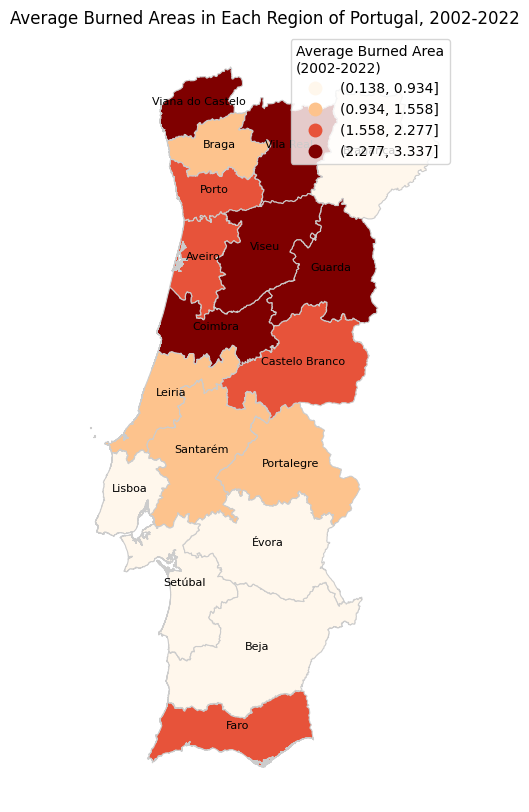

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# # Load the mainlandburn shapefile
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)

# # Optional: Convert "Burned_Are" to a categorical variable for discrete classes
mainlandburn['Burned_Are_Cat'] = pd.qcut(mainlandburn['Burned_Are'], q=4, duplicates='drop').astype(str)

# Creating the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mainlandburn.plot(column='Burned_Are_Cat', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'title': 'Average Burned Area\n(2002-2022)'})

# Adding labels to the regions (adjust the label field as necessary)
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
ax.set_axis_off()
plt.show()


**It does not work. Recreate the choropleth map and the legend. Ask me 3 additional questions**

1.Can you describe any error messages or issues you encountered when attempting to run the updated script? This can help identify specific problems with the code execution.

2.Are there any specific requirements or preferences you have for the classification of the "Burned_Are" values into discrete classes? For example, would you prefer equal intervals, quantiles, or natural breaks for classifying the data?

3.Could you confirm if the "region" column for labeling the regions exists in the "mainlandburn" shapefile, or if the regions should be labeled based on another attribute? This would ensure accurate labeling in the map visualization.

1. the legend only shows 4 classes, I need 5 discrete classes. 2. I prefer equal intervals. 3.The  "NAME_1" column for labeling the regions exists in the "mainlandburn" shapefile

failed map/legend [labels]



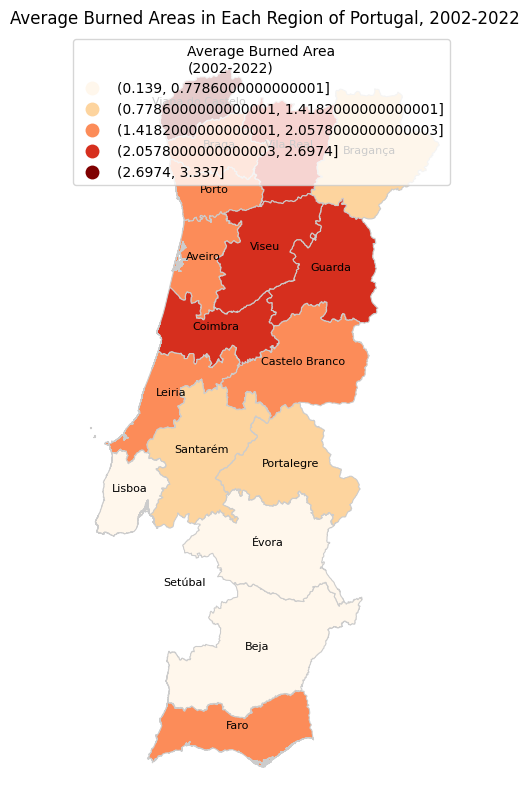

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the mainlandburn shapefile
mainlandburn_path = '/content/mainlandburn.shp'  # Update this path
mainlandburn = gpd.read_file(mainlandburn_path)

# Convert "Burned_Are" to a categorical variable for discrete classes based on equal intervals
interval_range = pd.interval_range(start=mainlandburn['Burned_Are'].min(), end=mainlandburn['Burned_Are'].max(), freq=(mainlandburn['Burned_Are'].max() - mainlandburn['Burned_Are'].min()) / 5)
mainlandburn['Burned_Are_Cat'] = pd.cut(mainlandburn['Burned_Are'], bins=interval_range, include_lowest=True, labels=[f"Class {i+1}" for i in range(5)])

# Creating the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mainlandburn.plot(column='Burned_Are_Cat', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'title': 'Average Burned Area\n(2002-2022)'})

# Adding labels to the regions using the "NAME_1" column
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
ax.set_axis_off()
plt.show()


In [ ]:
pip install geopandas matplotlib numpy pandas


**The legend numbers should have only 2 decimals. Ask me 3 additional questions**

1.Besides adjusting the legend labels to display only two decimal places, would you like any specific formatting applied to these numbers (e.g., rounding, truncating, adding suffixes)?

2.Given the adjustment to two decimal places for the legend labels, do you have any preferences for the legend's title or additional text that explains the unit of measurement for the "Burned_Are" values?

3.Is there any other element on the map or in the legend that you'd like to customize further, such as adjusting the color scheme, changing the font sizes, or adding other annotations to the map?

1. no 2. the legend title is "Burned area per region[ha/km²]" 3. no

failed legend

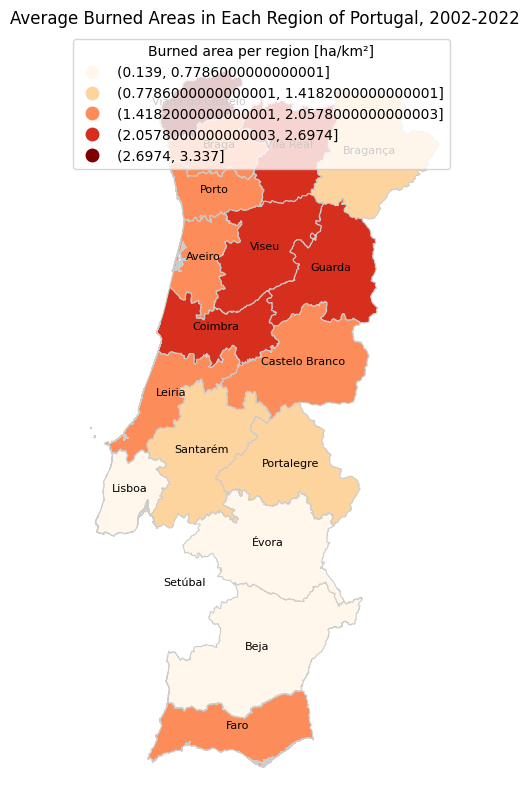

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# # Load the mainlandburn shapefile
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)

# Create 5 equal intervals for the "Burned_Are" values
interval_range = pd.interval_range(start=mainlandburn['Burned_Are'].min(), end=mainlandburn['Burned_Are'].max(), freq=(mainlandburn['Burned_Are'].max() - mainlandburn['Burned_Are'].min()) / 5)
mainlandburn['Burned_Are_Cat'] = pd.cut(mainlandburn['Burned_Are'], bins=interval_range, include_lowest=True)

# Format interval labels with 2 decimal places
interval_labels = [f"{interval.left:.2f} - {interval.right:.2f}" for interval in interval_range]
mainlandburn['Burned_Are_Cat'] = pd.cut(mainlandburn['Burned_Are'], bins=interval_range, labels=interval_labels, include_lowest=True)

# Creating the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mainlandburn.plot(column='Burned_Are_Cat', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'title': 'Burned area per region [ha/km²]'})

# Adding labels to the regions using the "NAME_1" column
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
ax.set_axis_off()
plt.show()


**Reclassify the map data to Equal interval and edit the legend to have only 2 decimals. Ask me 3 additional questions**

1.For the reclassification into equal intervals, do you have a specific number of intervals in mind, considering the update to five intervals mentioned earlier? This would help in adjusting the classification precisely to your needs.

2.When editing the legend to display only two decimals, should the intervals themselves be rounded to ensure the end points also adhere to this precision, or is the concern purely with the legend's display?

3.Given the focus on equal intervals and precise legend formatting, are there any specific thresholds or significant values within the "Burned_Are" data that you believe should define the boundaries of these intervals, or is an automated calculation based on the data range still preferred?

1. 5 intervals 2. you should concern purely with the legend's display 3. edit the legend of the lower values to be unique from the upper values of the next class

work legend/map

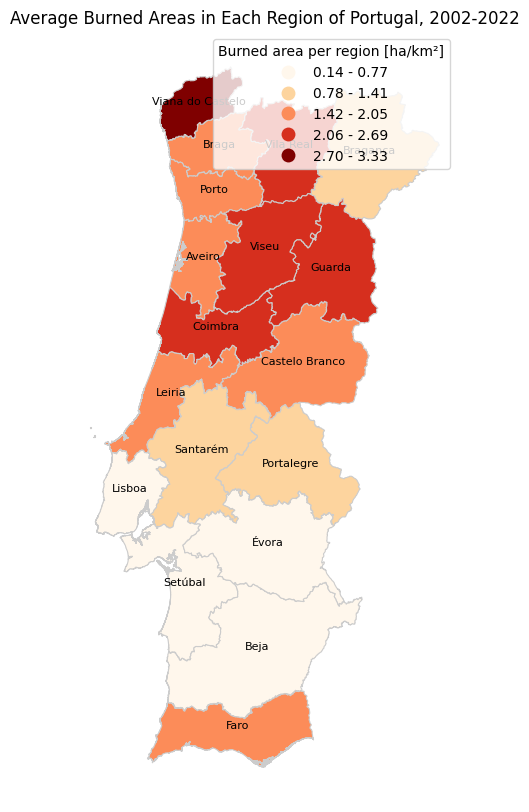

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# # Load the mainlandburn shapefile
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)

# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'title': 'Burned area per region [ha/km²]'})

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
ax.set_axis_off()
plt.show()


**From the previous code, can you add the state boundary with a dark brown color using hex code to the legend also, below the burned area? Ask 3 additional questions**

1.Is the state boundary to be added from the "boundary" shapefile you mentioned earlier? This would help ensure we're adding the correct boundary data to the map.

2.Do you want the state boundary to be represented as a line in the legend, indicating it's not part of the choropleth but rather a boundary demarcation?

3.How would you like the state boundary labeled in the legend? For example, would a simple label like "State Boundary" suffice, or do you have a specific name or description in mind?

1. the state boundary is "boundary" shapefile 2. I want the state boundary to be represented as a line in the legend 3. the state boundary labeled in the legend will be indicated "State boundary"

failed legend [legend/map]

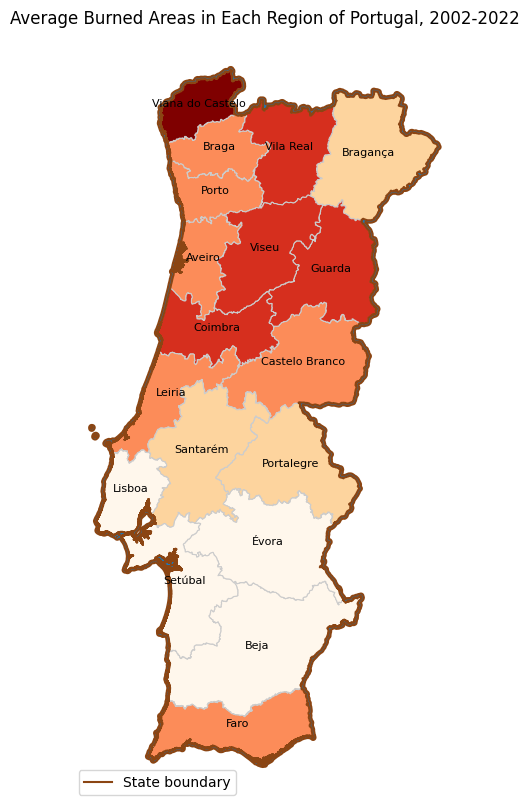

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

# Load the shapefiles
mainlandburn_path = '/content/mainlandburn.shp'  # Update this path
boundary_path = '/content/boundary.shp'  # Update this path
mainlandburn = gpd.read_file(mainlandburn_path)
boundary = gpd.read_file(boundary_path)

# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'title': 'Burned area per region [ha/km²]'})

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-', label='State boundary')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually add legend for state boundary
legend_elements = [Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary')]
ax.legend(handles=legend_elements, loc='lower left')

plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
ax.set_axis_off()
plt.show()


**Add the previous burned area classes into the legend.** failed legend

ValueError: Invalid RGBA argument: 'OrRd'

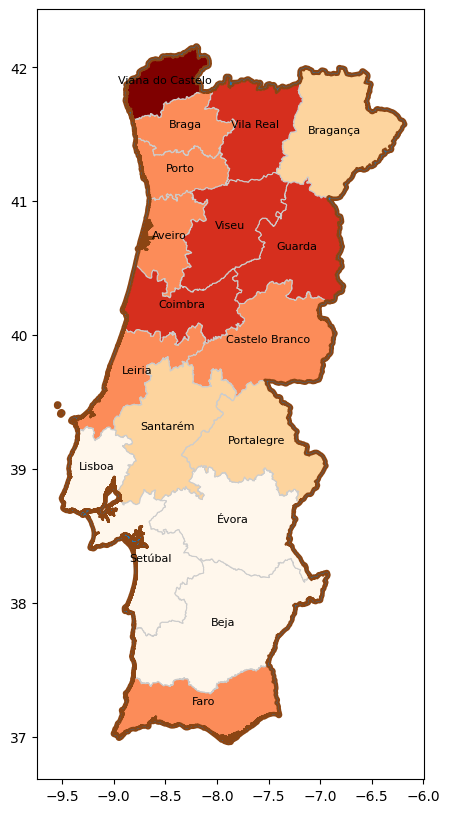

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Load the shapefiles
mainlandburn_path = '/content/mainlandburn.shp'  # Update this path
boundary_path = '/content/boundary.shp'  # Update this path
mainlandburn = gpd.read_file(mainlandburn_path)
boundary = gpd.read_file(boundary_path)

# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Create custom legend elements
legend_elements = [Patch(facecolor='OrRd', edgecolor='0.8', label='Burned Area Classes')]
for color, label in zip(plt.cm.OrRd(np.linspace(0, 1, 5)), interval_labels):
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='lower left', fontsize='small')

plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
ax.set_axis_off()
plt.show()


**fix this error "ValueError: Invalid RGBA argument: 'OrRd'"** work legend

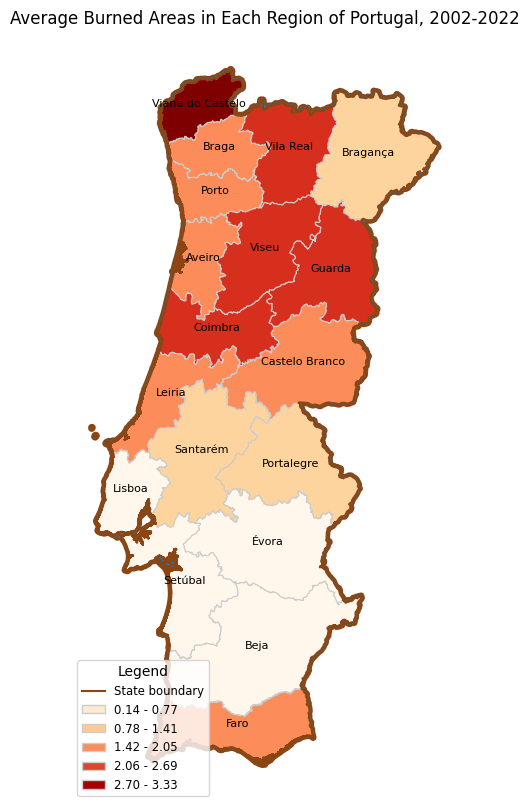

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# # Load the shapefiles
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# boundary_path = 'your_path_here/boundary.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)
# boundary = gpd.read_file(boundary_path)

# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Create a color patch for each interval
legend_elements = [Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary')]
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='lower left', fontsize='small')

plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
ax.set_axis_off()
plt.show()



**move the state boundary line under the burned area classes** work legend

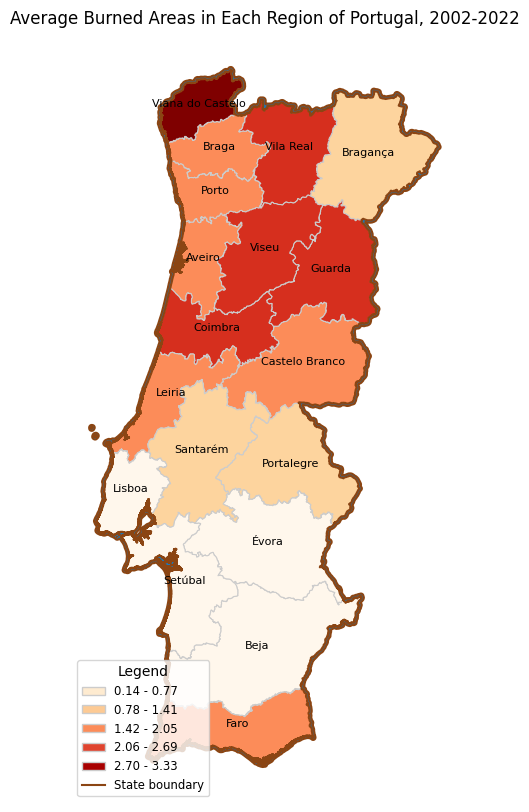

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# # Load the shapefiles
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# boundary_path = 'your_path_here/boundary.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)
# boundary = gpd.read_file(boundary_path)

# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='lower left', fontsize='small')

plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
ax.set_axis_off()
plt.show()


**Add a base map with low saturation. Ask me 3 additional questions**

1.Do you have a preference for the source of the basemap (e.g., OpenStreetMap, Stamen Terrain, or another provider)? Some providers offer specifically designed low-saturation or "watercolor" maps that might fit your requirements.

2.Considering the addition of a basemap, would you like to adjust the transparency (alpha) level of the choropleth overlay to ensure both the basemap and the choropleth data are visible and clear?

3.Will the map cover the whole of Portugal or focus on specific regions? Knowing this can help optimize the basemap's zoom level and centering for clarity and relevance to your data.

1.CartoDB 2.no 3.cover the whole of Portugal

work basemap

In [ ]:
pip install contextily


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 33.1 MB/s eta 0:00:00


In [ ]:
pip install matplotlib-scalebar


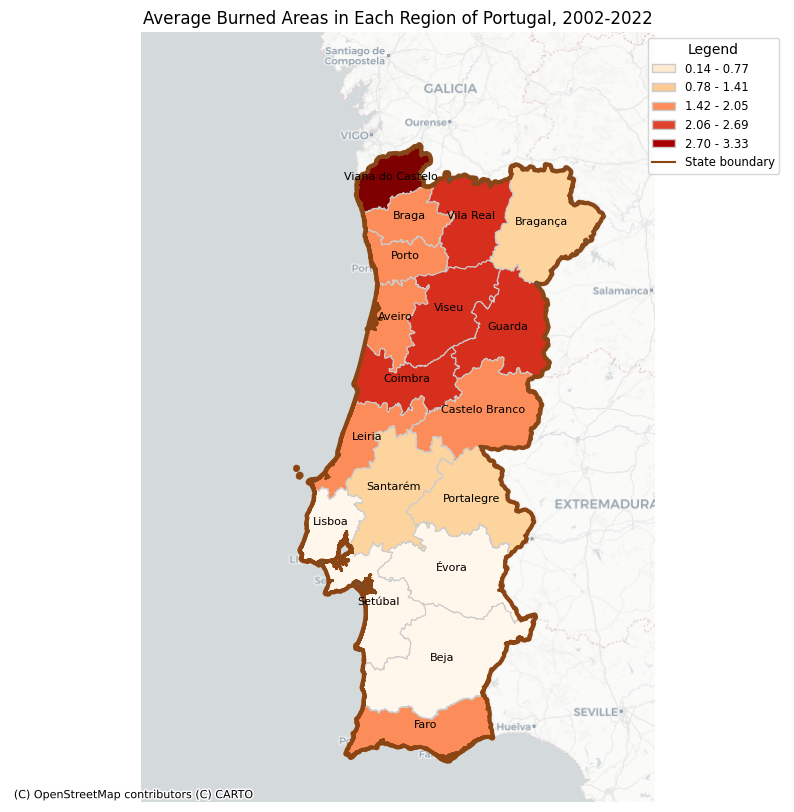

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import contextily as ctx

# # Load the shapefiles
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# boundary_path = 'your_path_here/boundary.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)
# boundary = gpd.read_file(boundary_path)
# Ensure data is in Web Mercator for contextily
mainlandburn = mainlandburn.to_crs(epsg=3857)
boundary = boundary.to_crs(epsg=3857)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper right', fontsize='small')
# Add basemap with CartoDB tile
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.axis("equal")
plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')

ax.set_axis_off()
plt.show()


**Add only the map scale bar. Ask me 3 additional questions**

1.Where would you prefer the scale bar to be located on the map (e.g., bottom left, bottom right, top left, top right)?

2.What length should the scale bar represent (e.g., 10 km, 50 km), and in what units (e.g., kilometers, miles)?

3.Do you have any preferences for the style of the scale bar, such as color and thickness, to ensure it complements the map's aesthetic?

1. bottom right, 2.the length is 100km and unit parameter is "m" 3. grey color

failed scale bar

TypeError: ScaleBar.__init__() got an unexpected keyword argument 'scale_fmt'

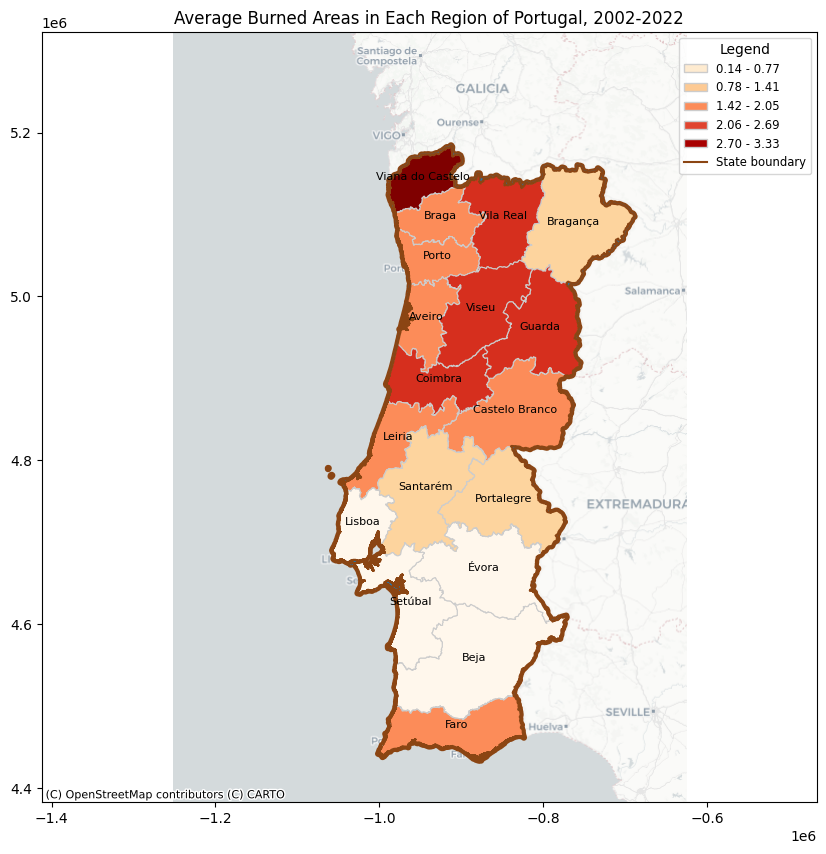

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

# # Load the shapefiles
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# boundary_path = 'your_path_here/boundary.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)
# boundary = gpd.read_file(boundary_path)
# Ensure data is in Web Mercator for contextily
mainlandburn = mainlandburn.to_crs(epsg=3857)
boundary = boundary.to_crs(epsg=3857)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper right', fontsize='small')
# Add basemap with CartoDB tile
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.axis("equal")
plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
# Add a scale bar at the bottom right of the map
scalebar = ScaleBar(1, location='lower right', units='m', scale_loc='bottom', length_fraction=0.25,
                    scale_fmt='{:,.0f}', dimension='si-length', box_alpha=0,
                    font_properties={'size': 'x-small', 'color': 'grey'},
                    color='grey', length=100000)  # 100 km in meters
ax.add_artist(scalebar)
ax.set_axis_off()
plt.show()


**There is an error "TypeError: ScaleBar.__init__() got an unexpected keyword argument 'scale_fmt'"** failed scale bar

TypeError: FontProperties.__init__() got an unexpected keyword argument 'color'

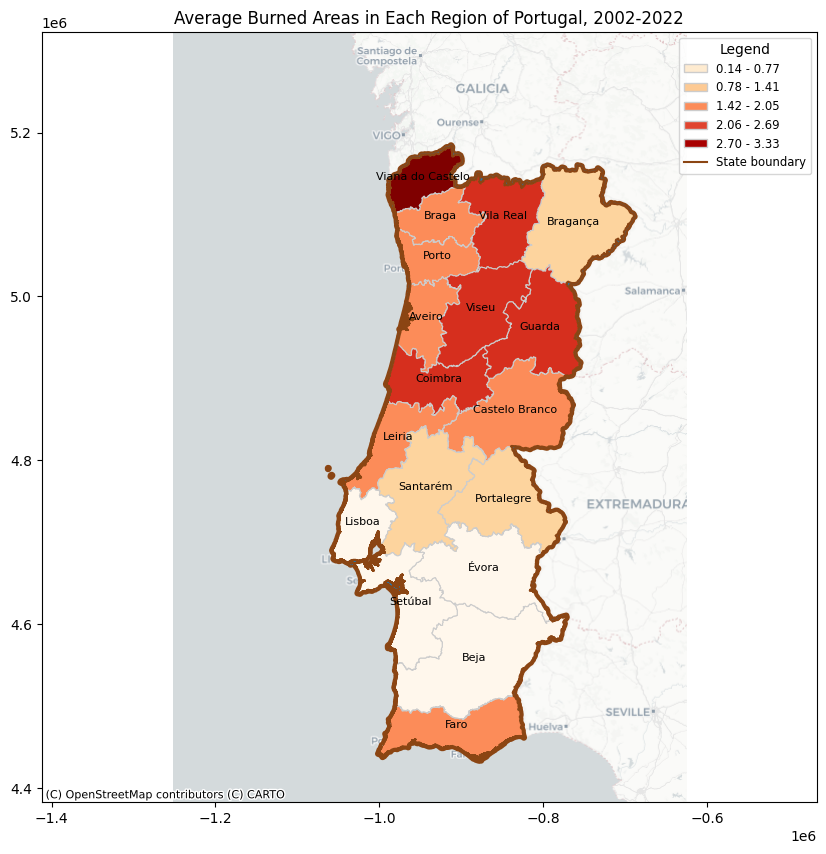

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

# # Load the shapefiles
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# boundary_path = 'your_path_here/boundary.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)
# boundary = gpd.read_file(boundary_path)
# Ensure data is in Web Mercator for contextily
mainlandburn = mainlandburn.to_crs(epsg=3857)
boundary = boundary.to_crs(epsg=3857)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper right', fontsize='small')
# Add basemap with CartoDB tile
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.axis("equal")
plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'color':'grey', 'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)
ax.set_axis_off()
plt.show()


**Fix this error "
TypeError: FontProperties.__init__() got an unexpected keyword argument 'color'** failed scale bar

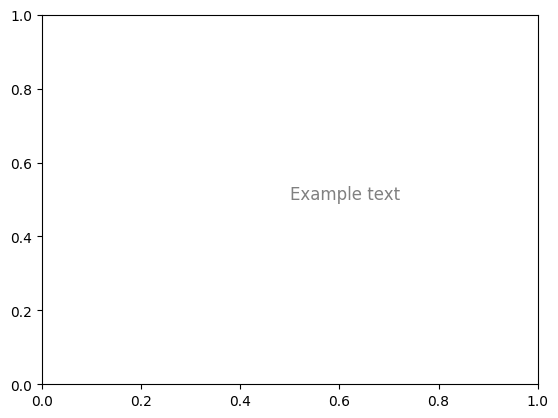

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Example text added to the plot
ax.text(0.5, 0.5, 'Example text', fontsize=12, color='grey')

plt.show()


**from this code, there is an error with "color"** work scale bar

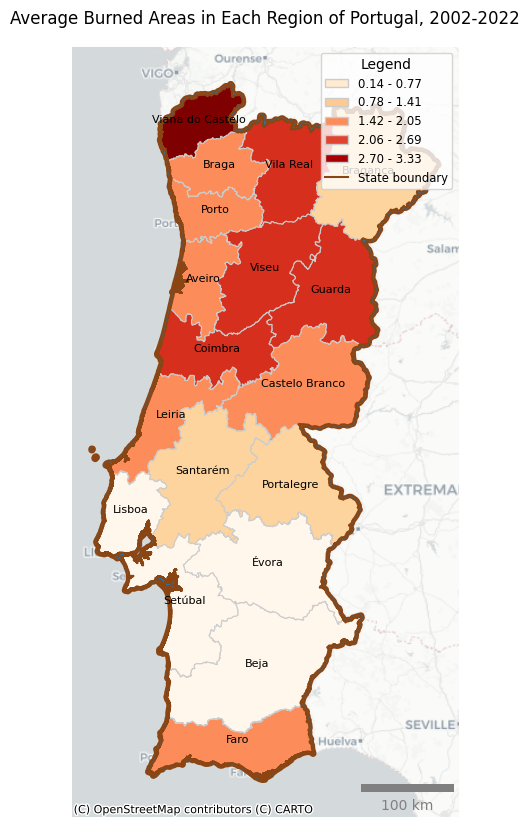

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

# # Load the shapefiles
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# boundary_path = 'your_path_here/boundary.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)
# boundary = gpd.read_file(boundary_path)
# Ensure data is in Web Mercator for contextily
mainlandburn = mainlandburn.to_crs(epsg=3857)
boundary = boundary.to_crs(epsg=3857)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper right', fontsize='small')
# Add basemap with CartoDB tile
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)
ax.set_axis_off()
plt.show()


**can you add a credit containing data source:, the author's name, place and year that the map was created? Here is the credit "Author: Parinda Pannoon Date: 12/03/2024 Spatial Reference: EPSG:3857 Data source: Global Wildfire Information System (GWIS)"-placed below the map properly by not overlapping other elements -less dominant in size and color. Ask me 3 additional questions**

1.Given the need to place the credit below the map without overlapping other elements, would you prefer the credit to be inside a designated margin area of the figure, or would adding it directly to the map canvas (but positioned in a way to minimize obstruction) be acceptable?

2.Regarding the less dominant size and color for the credit text, do you have specific preferences for the font size and color? For example, a smaller font size (e.g., 8 or 10 points) and a light grey color could make the credit less dominant while remaining readable.

3.Do you want the credit to be aligned in a particular way relative to the map's bottom edge (e.g., centered, left-aligned, right-aligned)?

1.  i prefer the credit to be inside a designated margin area of the figure 2. grey color with snall text size 3.  align to the bottom left of the map

work credits

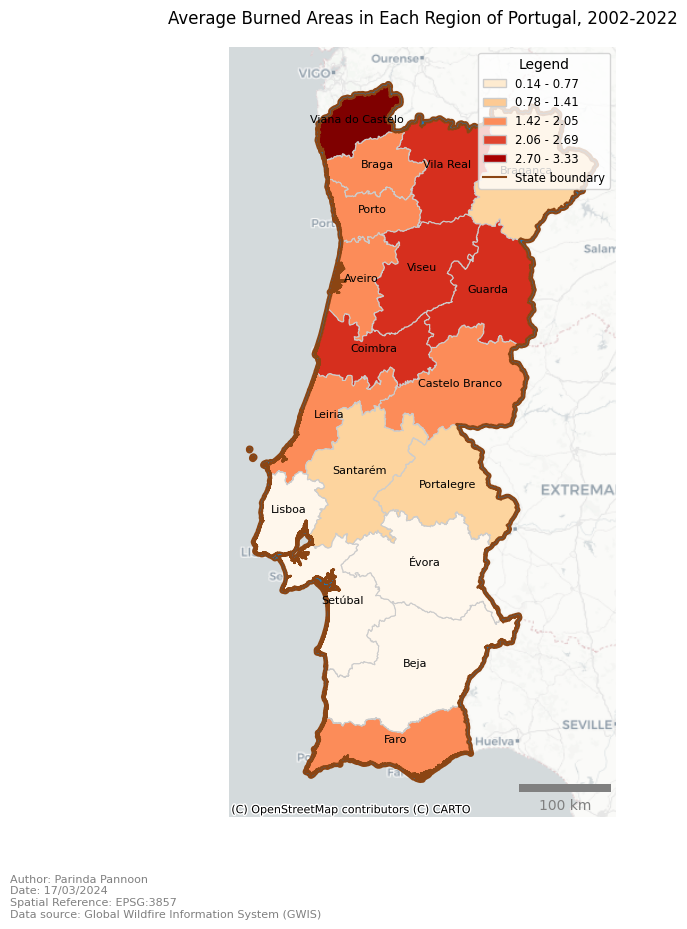

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

# # Load the shapefiles
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# boundary_path = 'your_path_here/boundary.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)
# boundary = gpd.read_file(boundary_path)
# Ensure data is in Web Mercator for contextily
mainlandburn = mainlandburn.to_crs(epsg=3857)
boundary = boundary.to_crs(epsg=3857)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper right', fontsize='small')
# Add basemap with CartoDB tile
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, ha="left", fontsize=8, color="grey")

ax.set_axis_off()
plt.show()


**Can you add a color background of the map layout, the color should be low saturation. Ask me 3 additional questions**

1.What specific shade or hex code of grey would you prefer for the low-saturation background color? This will help ensure the background meets your aesthetic requirements.

2.Should this background color apply to the entire figure including margins, or just around the map area itself?

3.Are there any other elements or areas within the figure (e.g., the legend, scale bar, credit text) that should not have this background color applied, or is it okay to have a uniform background across the entire layout?

1. #898888 2. this background color apply to the entire figure including margins, 3. it is okay to have a uniform background across the entire layout

work

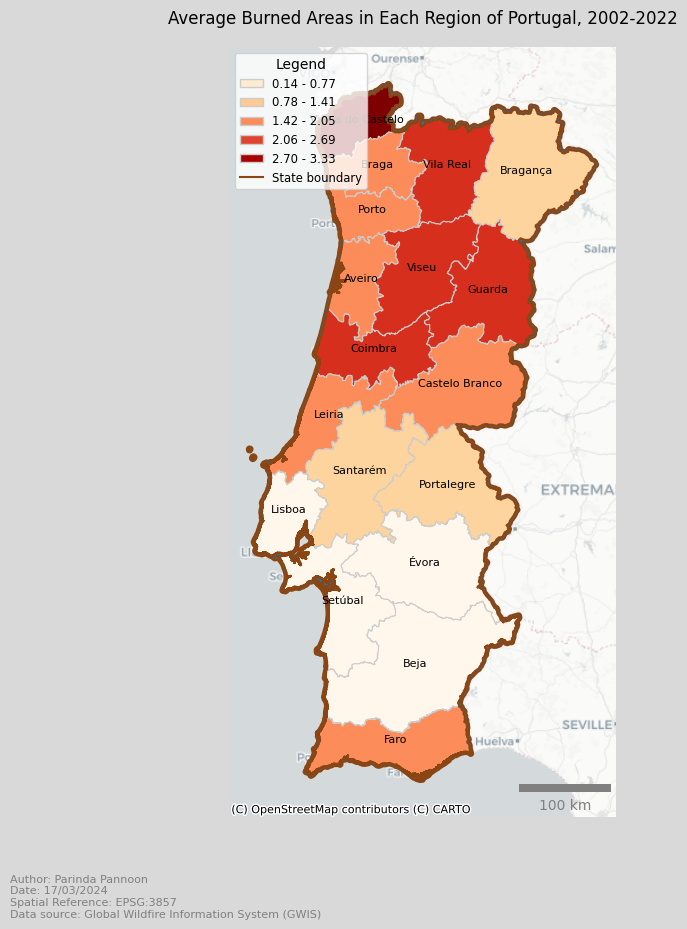

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

# # Load the shapefiles
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# boundary_path = 'your_path_here/boundary.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)
# boundary = gpd.read_file(boundary_path)
# Ensure data is in Web Mercator for contextily
mainlandburn = mainlandburn.to_crs(epsg=3857)
boundary = boundary.to_crs(epsg=3857)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.patch.set_facecolor('#D9D9D9')
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper left', fontsize='small')
# Add basemap with CartoDB tile
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, ha="left", fontsize=8, color="grey")

ax.set_axis_off()
plt.show()


**can you add a subtitle below the main title describing "Mainland of Portugal, 2002-2022" and change the main title to "AVERAGE BURNED AREA PER REGION AREA"? And the sub-title should be smaller and not so dominant as the main title. Ask me 3 additional questions**

1.For the subtitle "Mainland of Portugal, 2002-2022", do you have a specific font size in mind, given it should be smaller and less dominant than the main title? For example, if the main title is set at 14pt, would a subtitle size of 10pt or 12pt meet your expectations?

2.Regarding the color of the subtitle to ensure it's less dominant, would you prefer it to match the less dominant grey used for other elements like the credit, or should it be slightly more prominent?

3.Do you want any additional spacing between the main title and subtitle to visually separate them, or should they be closely positioned?

1. it should be smaller and less dominant than the main title 2.  it should be a black color 3.spacing between the main title and subtitle to visually separate them

failed sub[sub/title]

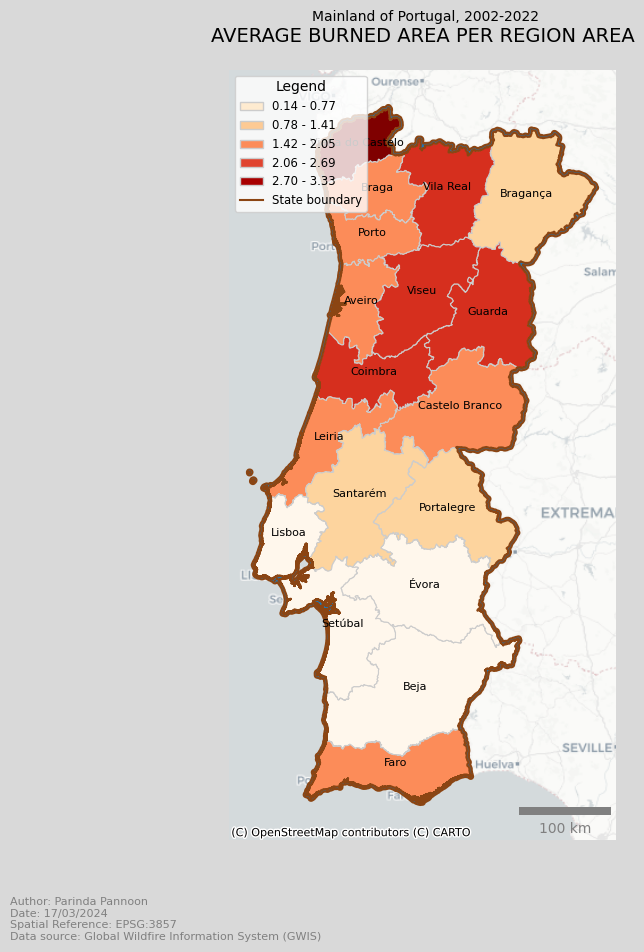

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

# # Load the shapefiles
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# boundary_path = 'your_path_here/boundary.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)
# boundary = gpd.read_file(boundary_path)
# Ensure data is in Web Mercator for contextily
mainlandburn = mainlandburn.to_crs(epsg=3857)
boundary = boundary.to_crs(epsg=3857)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.patch.set_facecolor('#D9D9D9')
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper left', fontsize='small')
# Add basemap with CartoDB tile
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, ha="left", fontsize=8, color="grey")

# Set the main title with a specific style
plt.title("AVERAGE BURNED AREA PER REGION AREA", fontsize=14, color='black', pad=20)

# Add the subtitle below the main title
plt.suptitle("Mainland of Portugal, 2002-2022", fontsize=10, color='black', x=0.515, y=0.94)

ax.set_axis_off()
plt.show()


**The subtitle should be under the map title. Ask 3 additional questions**

1. Considering the subtitle is to be positioned under the main title but still above the map, is there a particular reason you're opting for plt.suptitle instead of using plt.title for the main title and another method (like plt.text or adjusting plt.title positioning) for the subtitle to achieve the desired layout?

2.Would you like the main title's font size or style adjusted from the current setting to further distinguish it from the subtitle, beyond the differences in size and spacing already mentioned?

3.Is the precise vertical positioning of the subtitle (indicated by y=0.94 in your plt.suptitle example) suitable for your needs, or was this value chosen as a preliminary estimate that may require adjustment based on the final layout?

1. adjust the y position of the subtitle 2.the subtitle and map title use Serif font 3. reduce the y parameter

failed sub [title/sub]

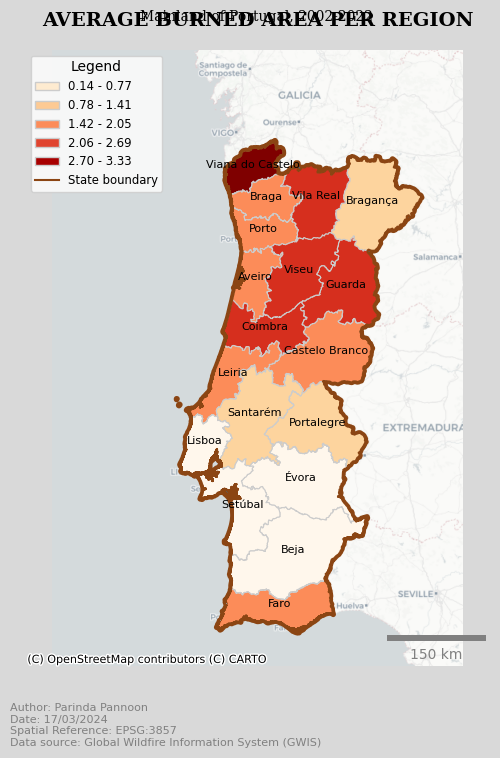

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

# # Load the shapefiles
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# boundary_path = 'your_path_here/boundary.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)
# boundary = gpd.read_file(boundary_path)
# Ensure data is in Web Mercator for contextily
mainlandburn = mainlandburn.to_crs(epsg=3857)
boundary = boundary.to_crs(epsg=3857)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
fig.patch.set_facecolor('#D9D9D9')
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper left', fontsize='small')
# Add basemap with CartoDB tile
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.axis("equal")
plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, ha="left", fontsize=8, color="grey")

# Set the main title
plt.title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'})

# Add the subtitle. Adjust the 'y' parameter to position it closer to the main title as needed.
plt.suptitle('Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', y=0.93, x=0.51)

ax.set_axis_off()
plt.show()


**can you add a data visualization from this CSV file to show "Average burned area yearly " ? The data will be shown as a vertical bar chart placed beside the map. Ask me 3 additional questions**

1.Would you like any specific color or style for the bars in the chart to differentiate between years or to align with the map's color scheme?

2.Is there a specific range of years you're interested in showcasing, or should the bar chart cover all years provided in the CSV file?

3.How do you envision the layout of the map and bar chart together? For example, do you prefer them in a side-by-side format within the same figure or as separate figures?

1.  bar chart uses color "#E1C461" 2.  cover all years 3. The chart and the map will be in a side-by-side format within the same figure

failed map [datavis/map]

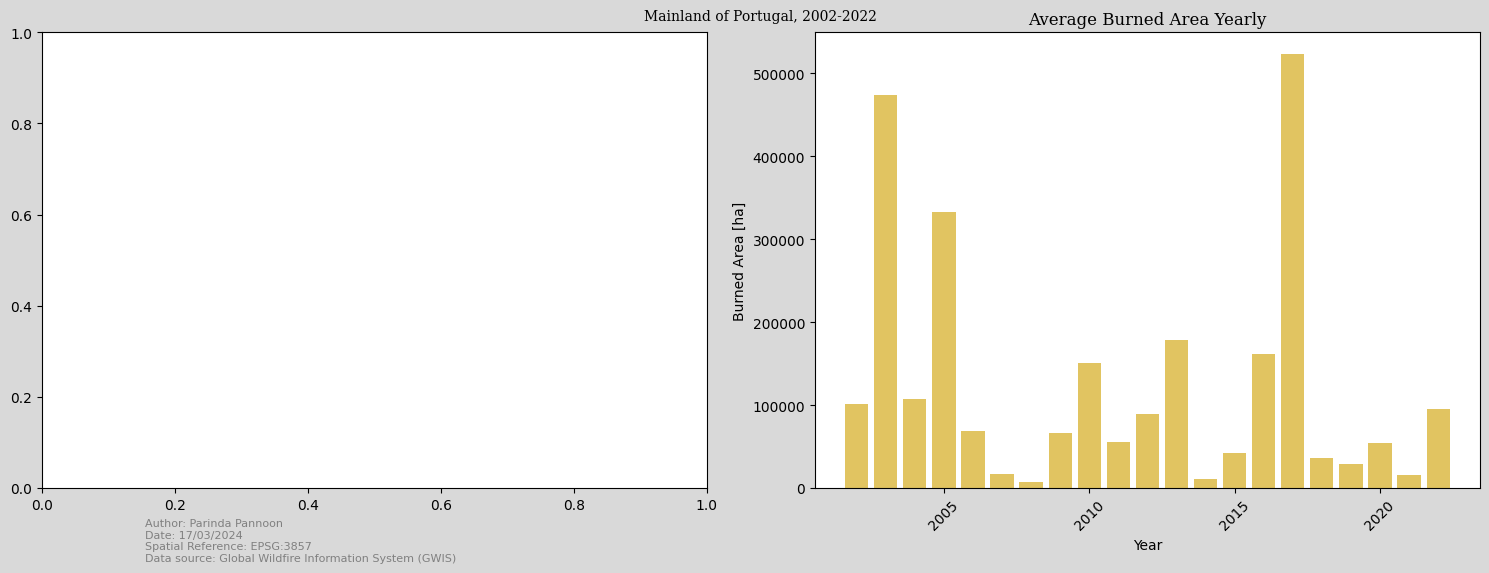

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

# # Load the shapefiles
# mainlandburn_path = 'your_path_here/mainlandburn.shp'  # Update this path
# boundary_path = 'your_path_here/boundary.shp'  # Update this path
# mainlandburn = gpd.read_file(mainlandburn_path)
# boundary = gpd.read_file(boundary_path)
# Ensure data is in Web Mercator for contextily
mainlandburn = mainlandburn.to_crs(epsg=3857)
boundary = boundary.to_crs(epsg=3857)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
# Create a figure with subplots: one for the map and one for the bar chart
fig, (ax_map, ax_chart) = plt.subplots(1, 2, figsize=(15, 6))

fig.patch.set_facecolor('#D9D9D9')
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper left', fontsize='small')
# Add basemap with CartoDB tile
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('Average Burned Areas in Each Region of Portugal, 2002-2022')
# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, ha="left", fontsize=8, color="grey")

# Set the main title
plt.title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'})

# Add the subtitle. Adjust the 'y' parameter to position it closer to the main title as needed.
plt.suptitle('Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', y=0.93, x=0.51)
# Load the CSV data
csv_path = '/content/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
data = pd.read_csv(csv_path)
# Plotting the bar chart for "Average Burned Area Yearly"
ax_chart.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
ax_chart.set_title('Average Burned Area Yearly')
ax_chart.set_xlabel('Year')
ax_chart.set_ylabel('Burned Area [ha]')
ax_chart.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
ax.set_axis_off()
plt.show()


**Duplicate this code, add a chart besides the map at the upper left** failed datavis/map 1 error analyzing

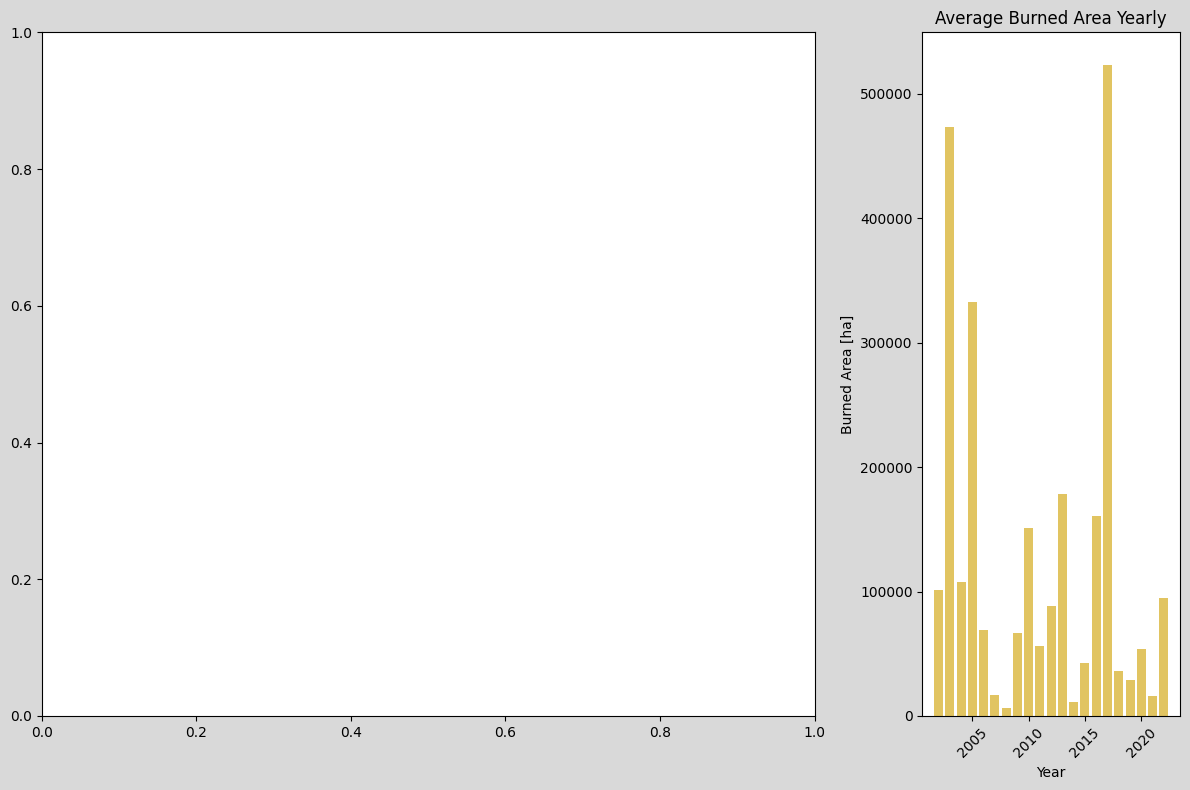

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming mainlandburn and boundary are already loaded and processed as in your provided script
# Please ensure to load your data and preprocess it as necessary before this part

# Load the CSV data for the bar chart
csv_path = '/content/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
data = pd.read_csv(csv_path)

# Create a figure with subplots for the map and the bar chart
fig, (ax_map, ax_chart) = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [3, 1]})
fig.patch.set_facecolor('#D9D9D9')

# Map plotting on ax_map (replicating your existing code for map preparation here)
# Ensure mainlandburn and boundary are reprojected to EPSG:3857 if using contextily basemap
mainlandburn = mainlandburn.to_crs(epsg=3857)
boundary = boundary.to_crs(epsg=3857)

# Plotting as per your setup, including basemap, annotations, legend, scale bar, and credits

# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)
fig.patch.set_facecolor('#D9D9D9')
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Bar chart plotting on ax_chart
ax_chart.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
ax_chart.set_title('Average Burned Area Yearly')
ax_chart.set_xlabel('Year')
ax_chart.set_ylabel('Burned Area [ha]')
ax_chart.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**it does not include the map visualization and other elements. Ask me 3 additional questions**

1.Could you confirm if the structure and preprocessing of the mainlandburn and boundary GeoDataFrames are exactly as you intended in your initial setup? This includes any specific data manipulations or visual styling you applied to these layers.

2.For the map visualization, are there any additional elements or layers (e.g., points of interest, annotations beyond region names) that you would like to include or emphasize on the map?

3.Regarding the overall layout and design of the figure containing both the map and the bar chart, do you have any specific preferences for the sizing or spacing between these two elements to ensure they are presented clearly and cohesively?

1. the mainlandburn and boundary GeoDataFrames are exactly as i intended in your initial setup. 2. include legend, credits, scale bar, title, subtitle 3. embed the chart inside the map frame, the chart should be very small

work datavis/map/legend/scale/title/subtitle/credits


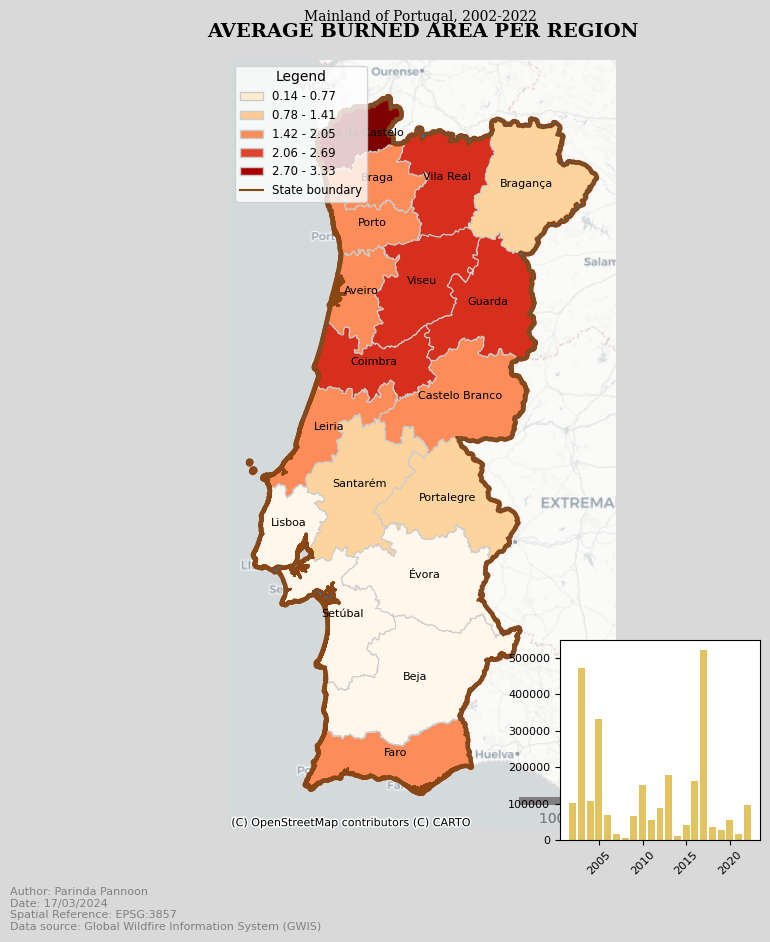

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming the mainlandburn and boundary GeoDataFrames are loaded and processed

# # Load the CSV data for the bar chart
# csv_path = '/path/to/your/csv/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
# data = pd.read_csv(csv_path)

# Main figure and map plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.patch.set_facecolor('#D9D9D9')
mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))
# Set the main title
plt.title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'})

# Add the subtitle. Adjust the 'y' parameter to position it closer to the main title as needed.
plt.suptitle('Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', y=0.93, x=0.51)
# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper left', fontsize='small')
# Embedding the bar chart inside the map frame
inset_ax = fig.add_axes([0.65, 0.1, 0.2, 0.2]) # Adjust these values [left, bottom, width, height] as needed
inset_ax.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
inset_ax.tick_params(axis='x', rotation=45, labelsize=8)
inset_ax.tick_params(axis='y', labelsize=8)

# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)

# Adding credits
ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, fontsize=8, color="grey")

ax.set_axis_off()

plt.show()


# **Prompt pattern: Question refinement**

**From now on, whenever I tell you to do a task about adjusting the map, suggest a better version to use that incorporates information specific to map creation.**

**....Task: From the following code, can you reposition the subtitle lower to not overlap with the map title? suggest me a better version of prompt** failed sub

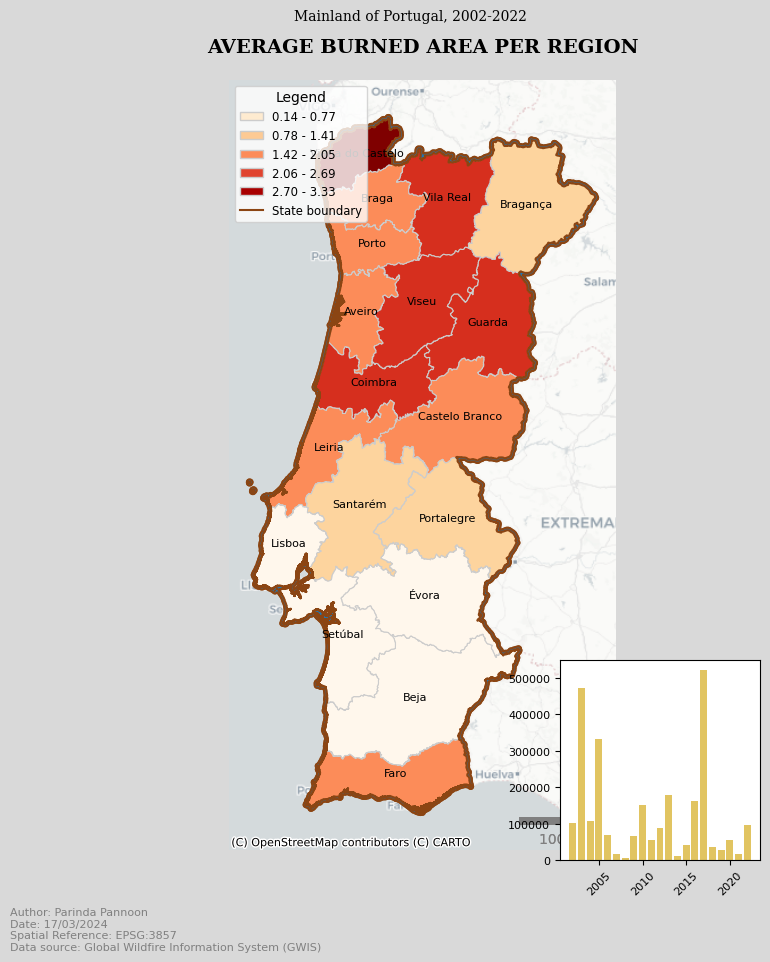

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming the mainlandburn and boundary GeoDataFrames are loaded and processed

# # Load the CSV data for the bar chart
# csv_path = '/path/to/your/csv/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
# data = pd.read_csv(csv_path)

# Main figure and map plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.patch.set_facecolor('#D9D9D9')
mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))
# Set the main title with adjusted positioning if needed
ax.set_title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'}, pad=20)

# Add the subtitle using plt.text for more precise control
fig.text(0.5, 0.94, 'Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', ha='center')

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper left', fontsize='small')
# Embedding the bar chart inside the map frame
inset_ax = fig.add_axes([0.65, 0.1, 0.2, 0.2]) # Adjust these values [left, bottom, width, height] as needed
inset_ax.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
inset_ax.tick_params(axis='x', rotation=45, labelsize=8)
inset_ax.tick_params(axis='y', labelsize=8)

# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)

# Adding credits
ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, fontsize=8, color="grey")

ax.set_axis_off()

plt.show()


**The subtitle is still above the map title. suggest me a better version of prompt** work subtitle

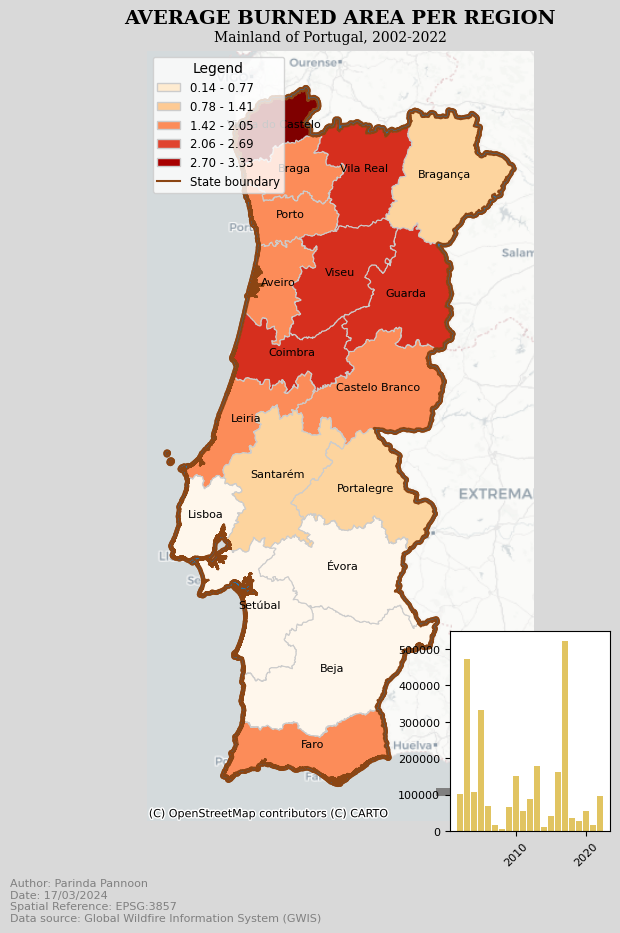

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming the mainlandburn and boundary GeoDataFrames are loaded and processed

# # Load the CSV data for the bar chart
# csv_path = '/path/to/your/csv/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
# data = pd.read_csv(csv_path)

# Main figure and map plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
fig.patch.set_facecolor('#D9D9D9')
mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))
# Set the main title with adjusted positioning if needed
ax.set_title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'}, pad=20)

# Add the subtitle using plt.text for more precise control
fig.text(0.5, 0.89, 'Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', ha='center')

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper left', fontsize='small')
# Embedding the bar chart inside the map frame
inset_ax = fig.add_axes([0.65, 0.1, 0.2, 0.2]) # Adjust these values [left, bottom, width, height] as needed
inset_ax.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
inset_ax.tick_params(axis='x', rotation=45, labelsize=8)
inset_ax.tick_params(axis='y', labelsize=8)

# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)

# Adding credits
ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, fontsize=8, color="grey")

ax.set_axis_off()

plt.show()


**...From this code, can you remove the white background of the chart and move the chart to the lower left of the map. Suggest a better version of prompt** work datavis

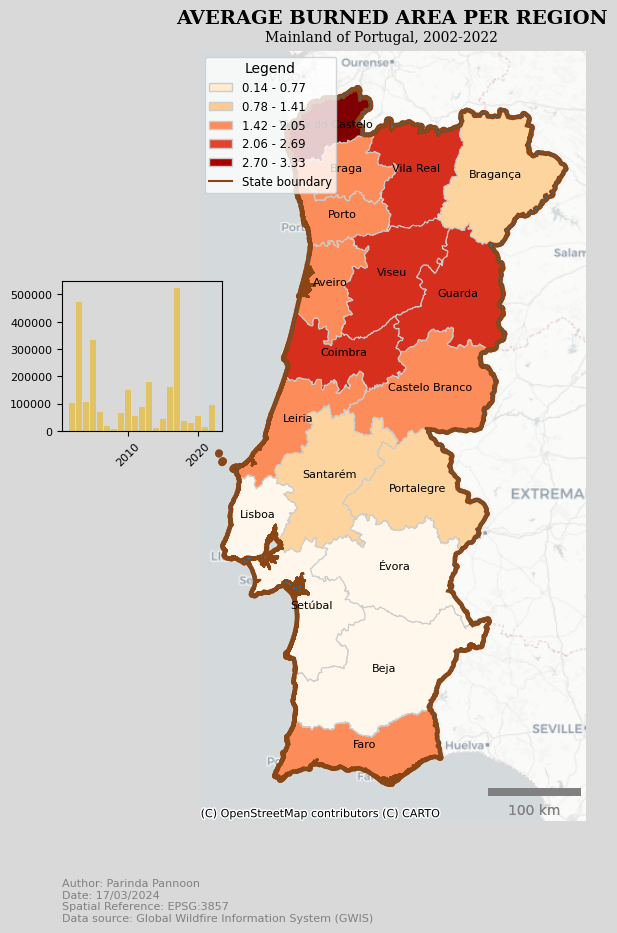

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming the mainlandburn and boundary GeoDataFrames are loaded and processed

# # Load the CSV data for the bar chart
# csv_path = '/path/to/your/csv/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
# data = pd.read_csv(csv_path)

# Main figure and map plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
fig.patch.set_facecolor('#D9D9D9')
mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))
# Set the main title with adjusted positioning if needed
ax.set_title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'}, pad=20)

# Add the subtitle using plt.text for more precise control
fig.text(0.5, 0.89, 'Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', ha='center')

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper left', fontsize='small')
# Embedding the bar chart inside the map frame
inset_ax = fig.add_axes([0.1, 0.5, 0.2, 0.15]) # Adjust these values [left, bottom, width, height] as needed
inset_ax.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
inset_ax.tick_params(axis='x', rotation=45, labelsize=8)
inset_ax.tick_params(axis='y', labelsize=8)
inset_ax.set_facecolor('none')
# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)

# Adding credits
ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, fontsize=8, color="grey")

ax.set_axis_off()

plt.show()


**Can you add the chart title "Average Burned Area Yearly" and change the axis color to grey? Suggest a better version of the prompt**

Relocate the Chart for Better Integration: Positioning the chart in the lower left of the map makes it accessible without distracting from the main spatial analysis. This requires careful adjustment of the axes coordinates to fit within the map's context without obscuring important information.

Enhance Chart Aesthetics: Removing the white background of the chart and adjusting axis colors to grey will integrate the chart more seamlessly with the map, ensuring that it complements rather than competes with the spatial data. Additionally, adding a chart title provides clarity on the data being represented.

work datavis

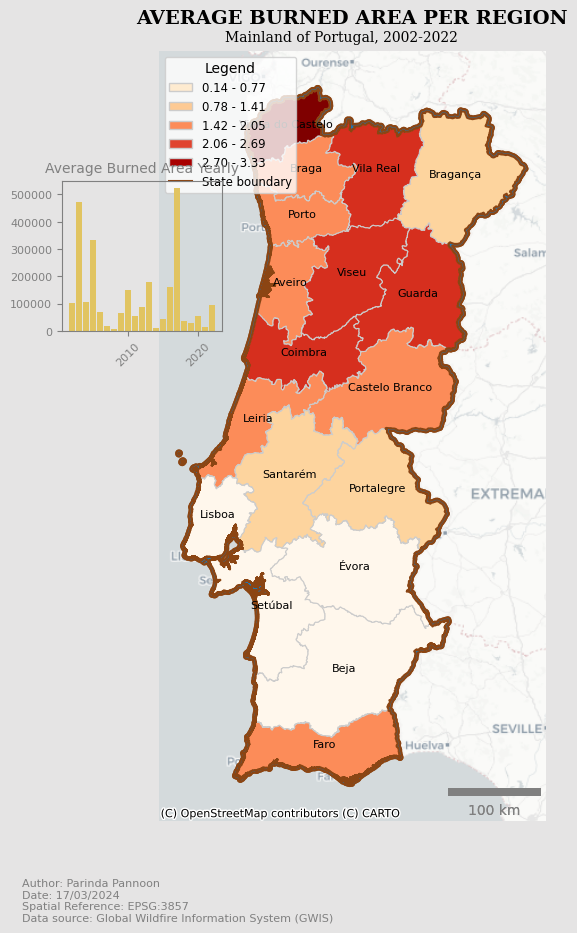

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming the mainlandburn and boundary GeoDataFrames are loaded and processed

# # Load the CSV data for the bar chart
# csv_path = '/path/to/your/csv/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
# data = pd.read_csv(csv_path)

# Main figure and map plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
fig.patch.set_facecolor('#E5E4E4')
mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))
# Set the main title with adjusted positioning if needed
ax.set_title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'}, pad=20)

# Add the subtitle using plt.text for more precise control
fig.text(0.5, 0.89, 'Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', ha='center')

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Legend', loc='upper left', fontsize='small')
# Embedding the bar chart inside the map frame
# Position the chart in the lower left corner of the map for cohesive integration
inset_ax = fig.add_axes([0.15, 0.6, 0.2, 0.15])  # Parameters are [left, bottom, width, height]
inset_ax.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
inset_ax.set_title('Average Burned Area Yearly', fontsize=10, color='grey')
inset_ax.tick_params(axis='x', rotation=45, labelsize=8, colors='grey')
inset_ax.tick_params(axis='y', labelsize=8, colors='grey')
# Ensure the chart background is transparent
inset_ax.set_facecolor('none')
# Optionally, remove chart borders for a more integrated look
for spine in inset_ax.spines.values():
    spine.set_edgecolor('grey')

# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)

# Adding credits
ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, fontsize=8, color="grey")

ax.set_axis_off()

plt.show()


**...From this code, can you move the legend box outside the map frame at the bottom left. Suggest a better version of prompt.**

To optimize the positioning of the legend box to enhance map readability and aesthetic appeal, consider placing the legend outside the map frame. This can help avoid obscuring important map details while still providing essential information. A refined approach involves adjusting the legend's location to the bottom left of the figure, outside the primary map area, which can be achieved by customizing the legend's placement relative to the figure's coordinates.

failed legend



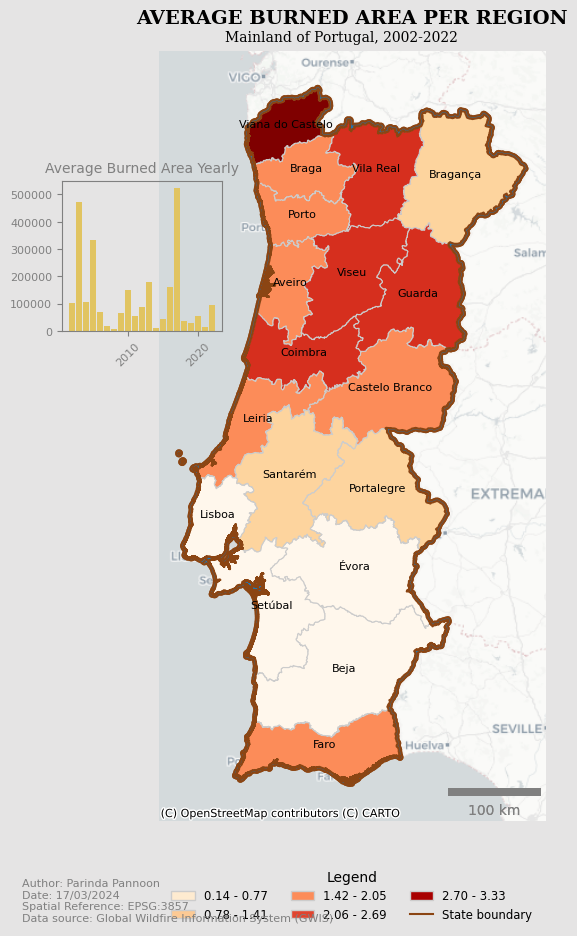

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming the mainlandburn and boundary GeoDataFrames are loaded and processed

# # Load the CSV data for the bar chart
# csv_path = '/path/to/your/csv/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
# data = pd.read_csv(csv_path)

# Main figure and map plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
fig.patch.set_facecolor('#E5E4E4')
mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))
# Set the main title with adjusted positioning if needed
ax.set_title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'}, pad=20)

# Add the subtitle using plt.text for more precise control
fig.text(0.5, 0.89, 'Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', ha='center')

# Add custom legend to the plot
# Placing the legend below the map within the figure
ax.legend(handles=legend_elements, title='Legend', loc='upper center', bbox_to_anchor=(0.5, -0.05), fontsize='small', ncol=3, frameon=False)
# Embedding the bar chart inside the map frame
# Position the chart in the lower left corner of the map for cohesive integration
inset_ax = fig.add_axes([0.15, 0.6, 0.2, 0.15])  # Parameters are [left, bottom, width, height]
inset_ax.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
inset_ax.set_title('Average Burned Area Yearly', fontsize=10, color='grey')
inset_ax.tick_params(axis='x', rotation=45, labelsize=8, colors='grey')
inset_ax.tick_params(axis='y', labelsize=8, colors='grey')
# Ensure the chart background is transparent
inset_ax.set_facecolor('none')
# Optionally, remove chart borders for a more integrated look
for spine in inset_ax.spines.values():
    spine.set_edgecolor('grey')

# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)

# Adding credits
ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, fontsize=8, color="grey")

ax.set_axis_off()

plt.show()


**Recreate the legend to overlay vertically and move to the bottom left of the map. And add the legend's title to "Burned area per region[ha/km²]". Suggest a better version of prompt** work legend

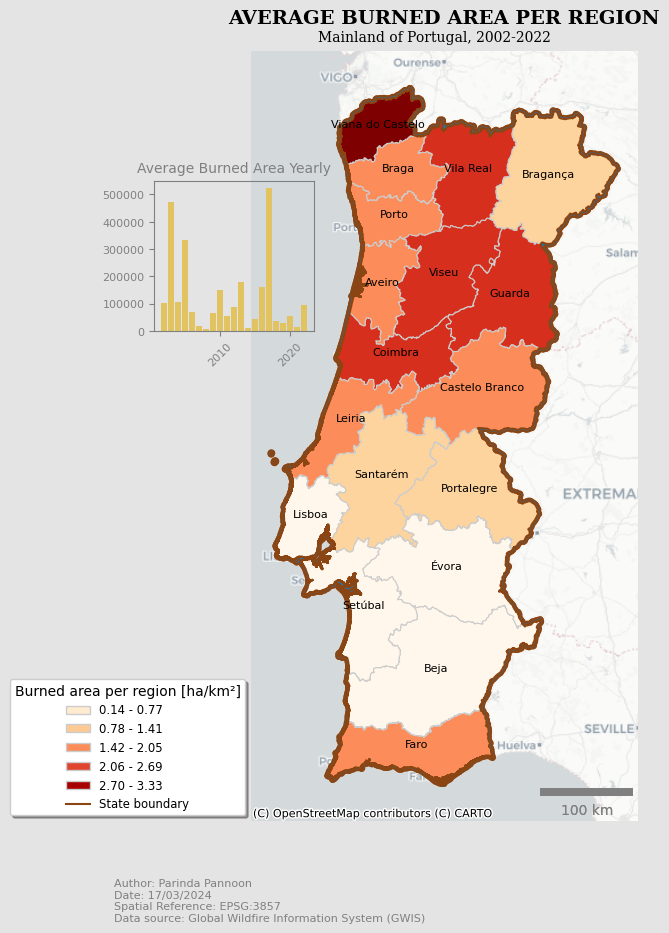

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming the mainlandburn and boundary GeoDataFrames are loaded and processed

# # Load the CSV data for the bar chart
# csv_path = '/path/to/your/csv/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
# data = pd.read_csv(csv_path)

# Main figure and map plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
fig.patch.set_facecolor('#E5E4E4')
mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))
# Set the main title with adjusted positioning if needed
ax.set_title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'}, pad=20)

# Add the subtitle using plt.text for more precise control
fig.text(0.5, 0.89, 'Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', ha='center')

# Add custom legend to the plot
# Placing the legend below the map within the figure
# Positioning the legend vertically at the bottom left of the map
ax.legend(handles=legend_elements, title='Burned area per region [ha/km²]', loc='lower right', bbox_to_anchor=(0, 0), fontsize='small', ncol=1, frameon=True, shadow=True, title_fontsize='medium')
# Embedding the bar chart inside the map frame
# Position the chart in the lower left corner of the map for cohesive integration
inset_ax = fig.add_axes([0.15, 0.6, 0.2, 0.15])  # Parameters are [left, bottom, width, height]
inset_ax.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
inset_ax.set_title('Average Burned Area Yearly', fontsize=10, color='grey')
inset_ax.tick_params(axis='x', rotation=45, labelsize=8, colors='grey')
inset_ax.tick_params(axis='y', labelsize=8, colors='grey')
# Ensure the chart background is transparent
inset_ax.set_facecolor('none')
# Optionally, remove chart borders for a more integrated look
for spine in inset_ax.spines.values():
    spine.set_edgecolor('grey')

# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)

# Adding credits
ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, fontsize=8, color="grey")

ax.set_axis_off()

plt.show()


**Remove the legend background and add the chart labels with grey color. Suggest a better version of prompt**

To enhance the visual clarity and integration of the map elements, consider adjusting the legend and chart labels for optimal readability and aesthetic alignment with the overall map design. Here’s how you can refine the presentation:

Legend Modification for Spatial Clarity: Adjust the legend to overlay vertically, ensuring it's placed strategically to minimize interference with important map features. This involves moving the legend to a less obtrusive location that still allows for easy reference.

Legend Title and Styling Enhancements: Introduce a descriptive title for the legend, such as "Burned area per region [ha/km²]", to provide clear context for the map data. Additionally, removing the legend background can help integrate the legend more seamlessly with the map, avoiding visual clutter.

Chart Label Color Adjustment for Consistency: Harmonize the chart labels by using a grey color, aligning with the map’s color scheme for a cohesive look and feel across the visualization.

work legend/datavis

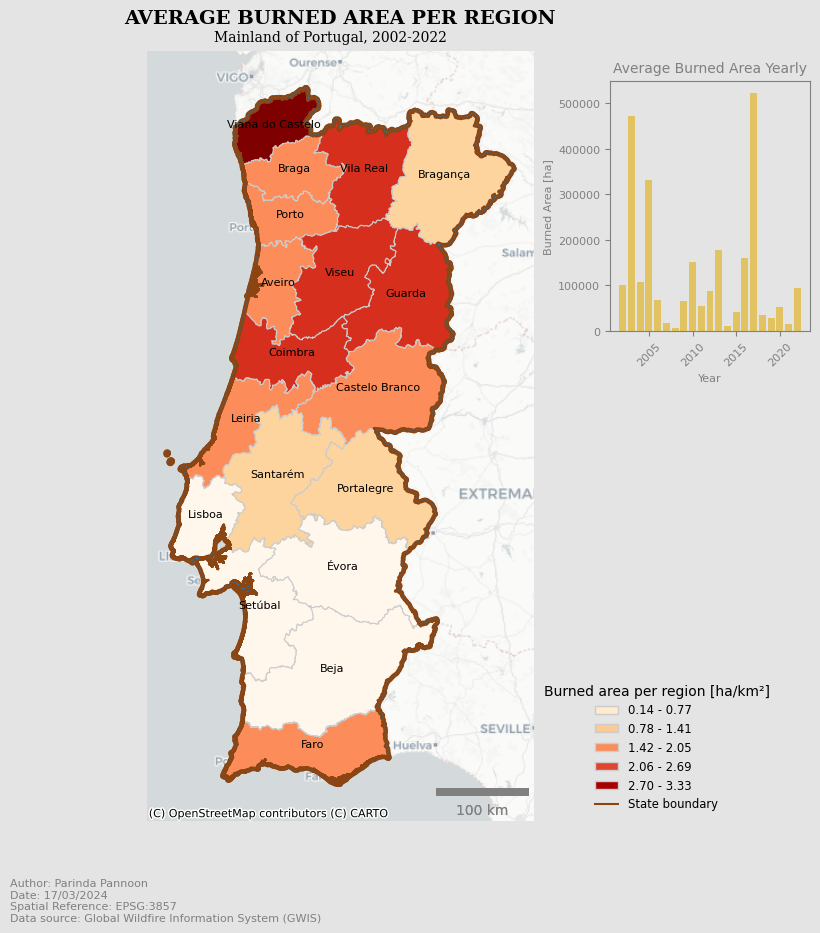

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming the mainlandburn and boundary GeoDataFrames are loaded and processed

# # Load the CSV data for the bar chart
# csv_path = '/path/to/your/csv/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
# data = pd.read_csv(csv_path)

# Main figure and map plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
fig.patch.set_facecolor('#E5E4E4')
mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add labels
for idx, row in mainlandburn.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))
# Set the main title with adjusted positioning if needed
ax.set_title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'}, pad=20)

# Add the subtitle using plt.text for more precise control
fig.text(0.5, 0.89, 'Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', ha='center')

# Add custom legend to the plot
# Placing the legend below the map within the figure
# Positioning the legend vertically at the bottom left of the map
# Apply legend enhancements for improved integration with the map
ax.legend(handles=legend_elements, title='Burned area per region [ha/km²]', loc='lower left', bbox_to_anchor=(1,0), fontsize='small', frameon=False, ncol=1)
# Embedding the bar chart inside the map frame
# Position the chart in the lower left corner of the map for cohesive integration
inset_ax = fig.add_axes([0.85, 0.6, 0.25, 0.25])  # Parameters are [left, bottom, width, height]
inset_ax.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
inset_ax.set_title('Average Burned Area Yearly', fontsize=10, color='grey')
inset_ax.tick_params(axis='x', rotation=45, labelsize=8, colors='grey')
inset_ax.tick_params(axis='y', labelsize=8, colors='grey')
# Incorporate chart label adjustments for visual consistency
inset_ax.set_xlabel('Year', color='grey', fontsize=8)
inset_ax.set_ylabel('Burned Area [ha]', color='grey', fontsize=8)

# Ensure the chart background is transparent
inset_ax.set_facecolor('none')
# Optionally, remove chart borders for a more integrated look
for spine in inset_ax.spines.values():
    spine.set_edgecolor('grey')

# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)

# Adding credits
ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.01, credit_text, fontsize=8, color="grey")

ax.set_axis_off()

plt.show()


**...Can you add a map frame color to dark red and add a white halo effect to the district's label? Suggest a better version of prompt**

To elevate the visual appeal and clarity of your map visualization, enhancing the frame with a distinct color can significantly improve the map's aesthetic and focus. Adding a dark red frame and ensuring all textual elements, including district labels, are legible against any background through the use of a white halo effect, are excellent strategies for achieving this. Here's how you could enhance your map's presentation:

Enhance Frame Aesthetics: Apply a dark red color to the map frame to create a visually striking border that delineates the map area clearly from its surroundings.

Improve Text Readability: Incorporate a white halo effect around district labels to ensure they remain legible against varied backgrounds within the map. This effect can help text stand out by providing a contrasting outline.

Maintain Visual Consistency: Ensure that the chart labels and other textual elements within the map maintain a grey color to keep the visual presentation cohesive and balanced.

work labels

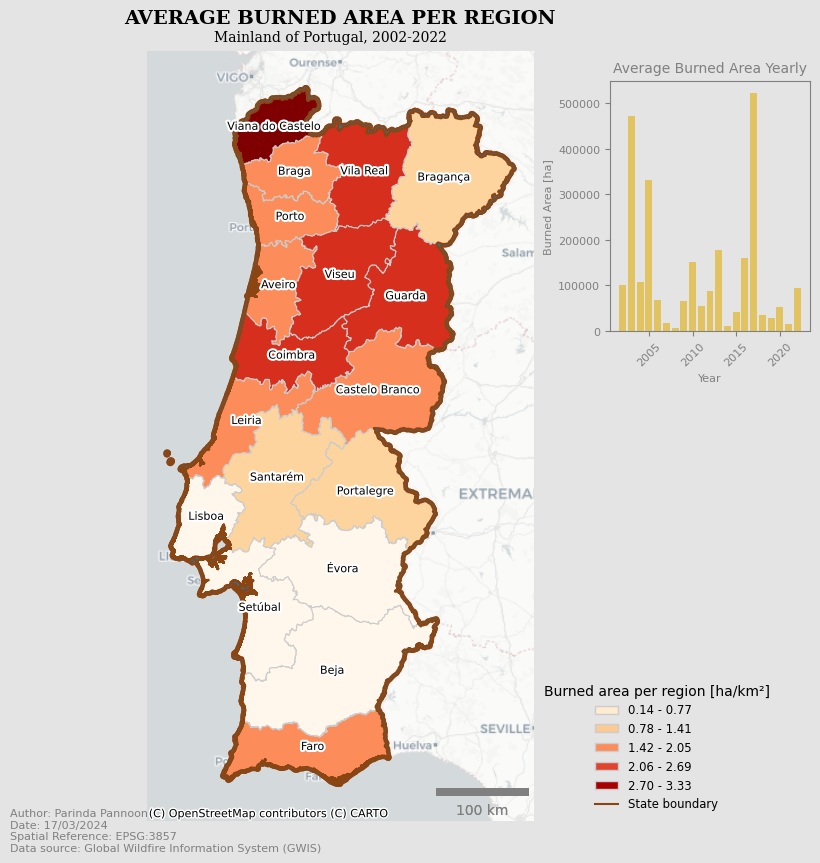

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.patheffects as path_effects
# Assuming the mainlandburn and boundary GeoDataFrames are loaded and processed

# # Load the CSV data for the bar chart
# csv_path = '/path/to/your/csv/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
# data = pd.read_csv(csv_path)

# Main figure and map plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
fig.patch.set_facecolor('#E5E4E4')

mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Adding district labels with a white halo effect for enhanced readability
for idx, row in mainlandburn.iterrows():
    ax.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                horizontalalignment='center', verticalalignment='center',
                fontsize=8, color='black',
                path_effects=[path_effects.withStroke(linewidth=3, foreground="white")])

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))
# Set the main title with adjusted positioning if needed
ax.set_title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'}, pad=20)

# Add the subtitle using plt.text for more precise control
fig.text(0.5, 0.89, 'Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', ha='center')

# Add custom legend to the plot
# Placing the legend below the map within the figure
# Positioning the legend vertically at the bottom left of the map
# Apply legend enhancements for improved integration with the map
ax.legend(handles=legend_elements, title='Burned area per region [ha/km²]', loc='lower left', bbox_to_anchor=(1,0), fontsize='small', frameon=False, ncol=1)
# Embedding the bar chart inside the map frame
# Position the chart in the lower left corner of the map for cohesive integration
inset_ax = fig.add_axes([0.85, 0.6, 0.25, 0.25])  # Parameters are [left, bottom, width, height]
inset_ax.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
inset_ax.set_title('Average Burned Area Yearly', fontsize=10, color='grey')
inset_ax.tick_params(axis='x', rotation=45, labelsize=8, colors='grey')
inset_ax.tick_params(axis='y', labelsize=8, colors='grey')
# Incorporate chart label adjustments for visual consistency
inset_ax.set_xlabel('Year', color='grey', fontsize=8)
inset_ax.set_ylabel('Burned Area [ha]', color='grey', fontsize=8)

# Ensure the chart background is transparent
inset_ax.set_facecolor('none')
# Optionally, remove chart borders for a more integrated look
for spine in inset_ax.spines.values():
    spine.set_edgecolor('grey')

# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)

# Adding credits
ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.08, credit_text, fontsize=8, color="grey")

ax.set_axis_off()

plt.show()


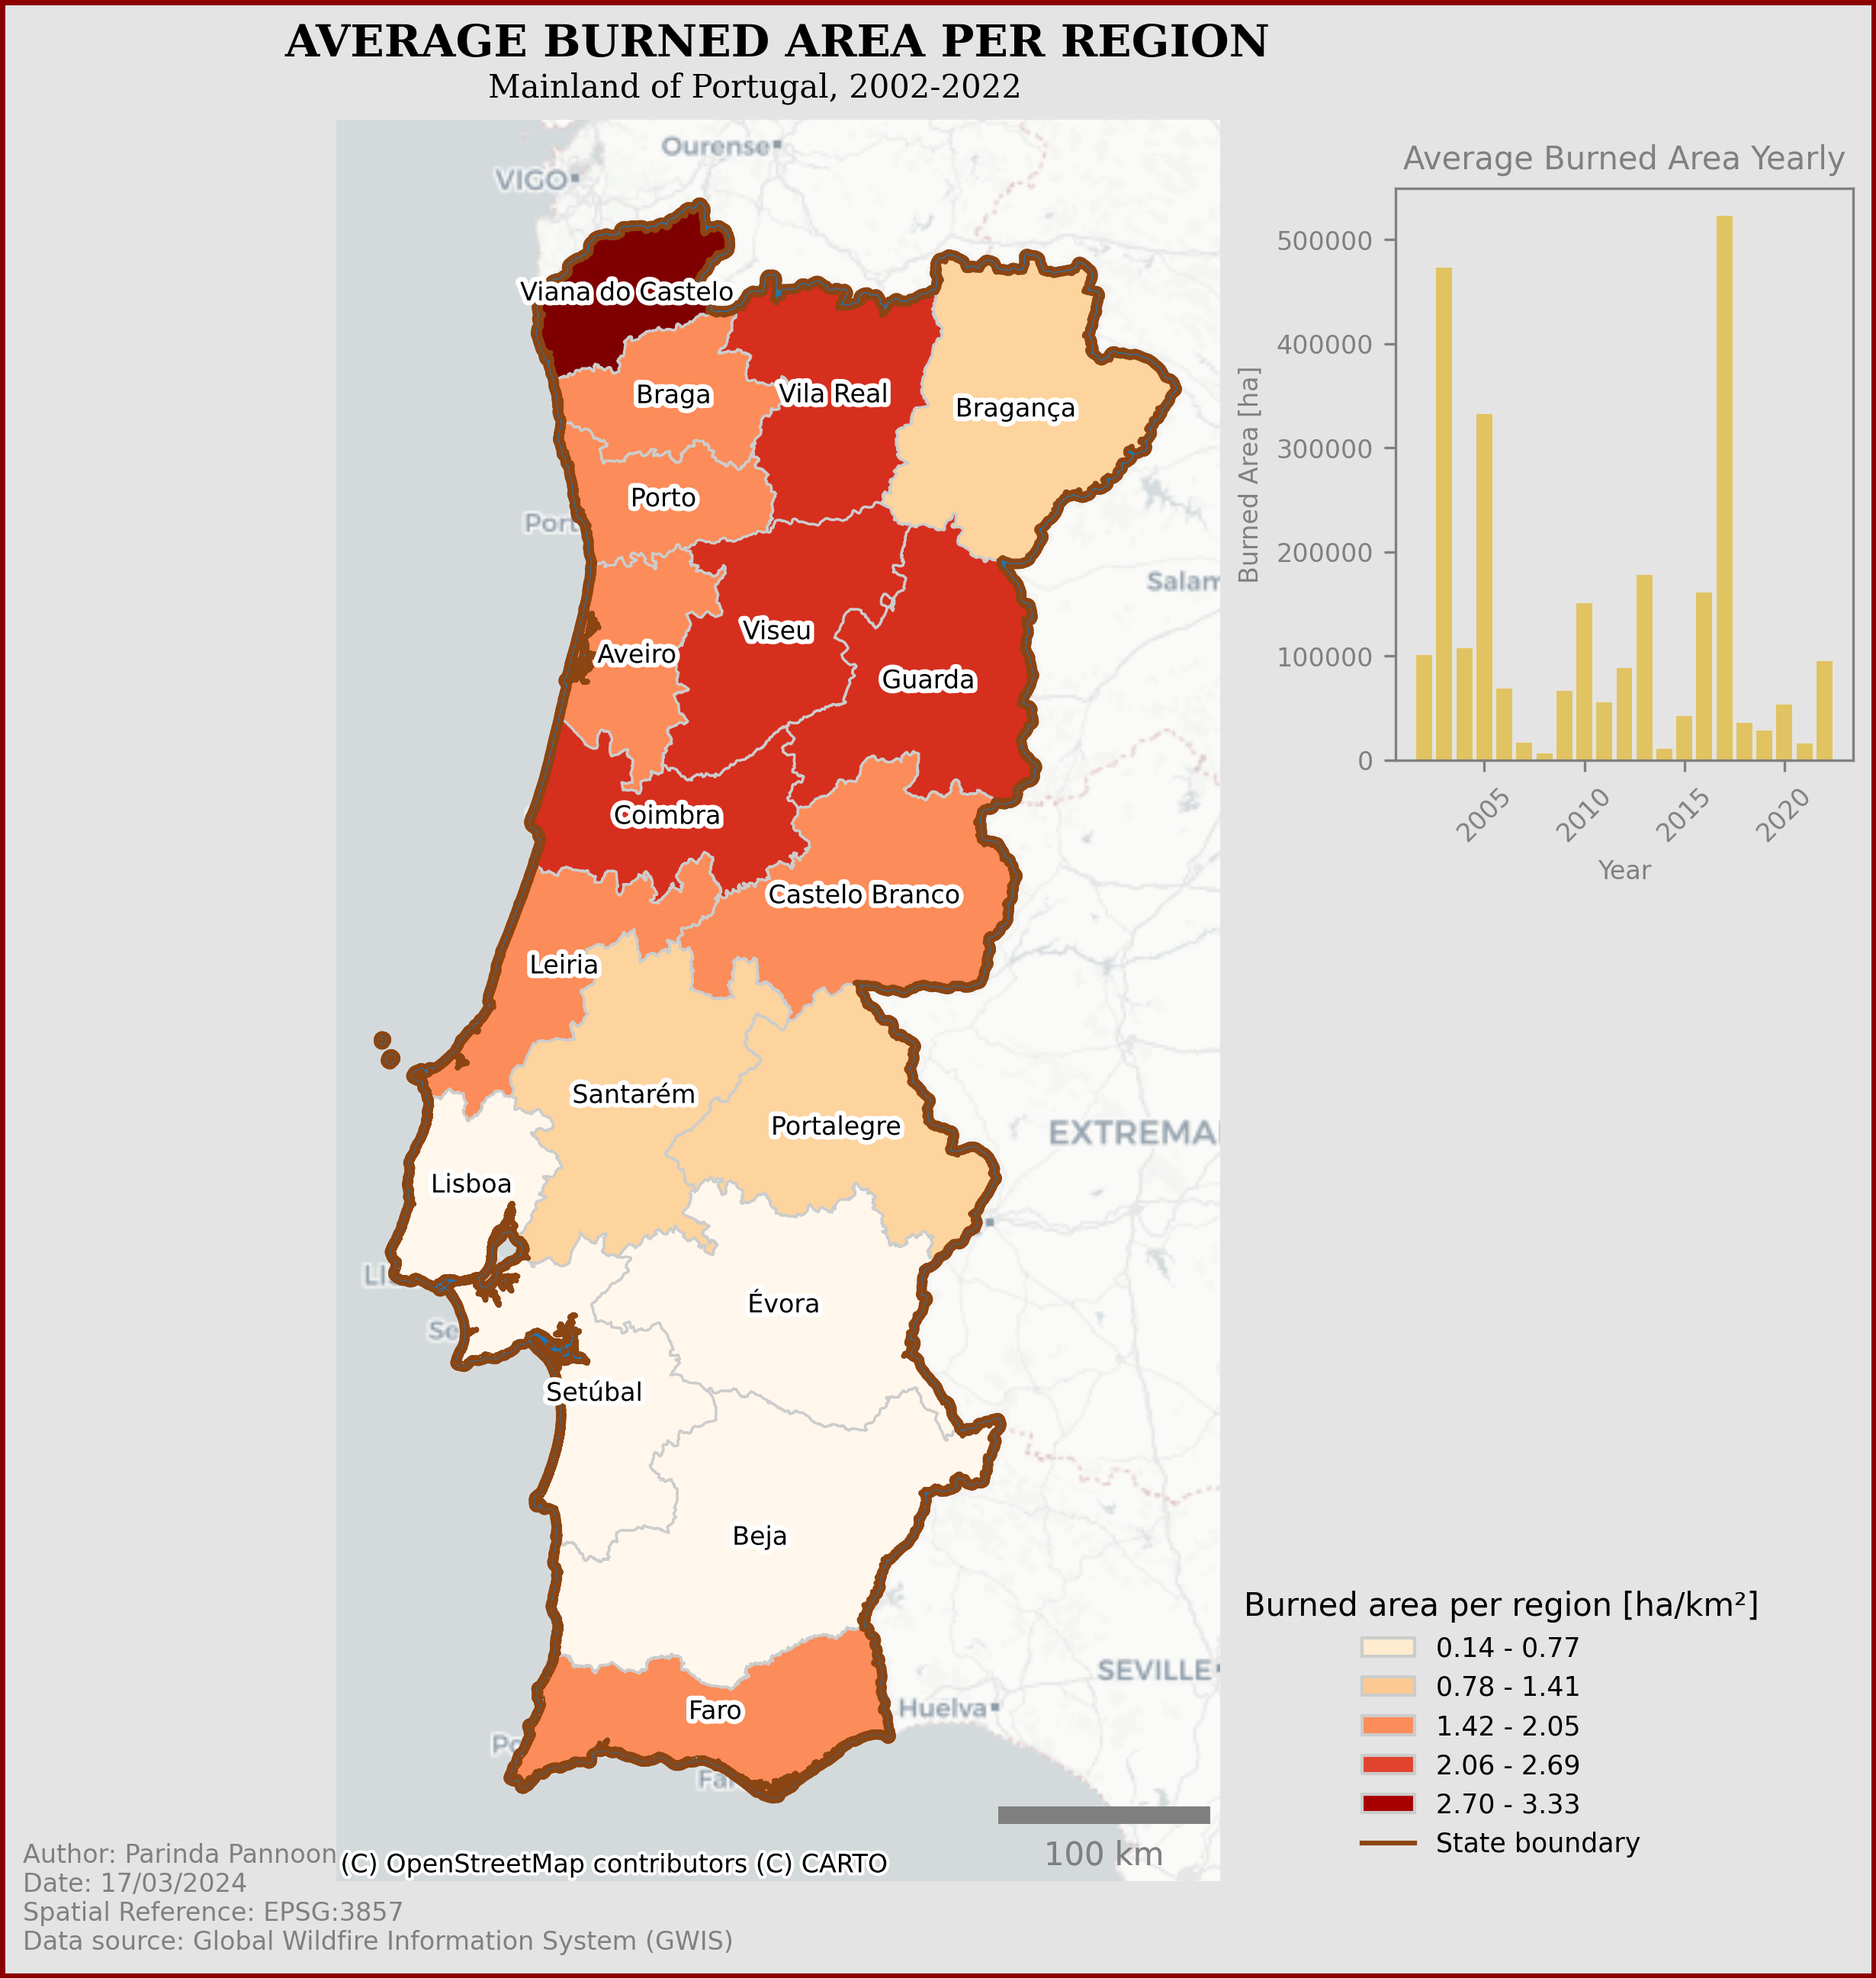

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.patheffects as path_effects
# Assuming the mainlandburn and boundary GeoDataFrames are loaded and processed

# # Load the CSV data for the bar chart
# csv_path = '/path/to/your/csv/MCD64.006.yearly-ba-nf.2002-2022.PRT_Portugal.csv'
# data = pd.read_csv(csv_path)

# Main figure and map plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10), dpi=300)
fig.patch.set_facecolor('#E5E4E4')
fig.patch.set_edgecolor('#8B0000')  # Dark red color
fig.patch.set_linewidth(3)

mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Add base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# Determine 5 equal intervals for "Burned_Are"
min_value = mainlandburn['Burned_Are'].min()
max_value = mainlandburn['Burned_Are'].max()
interval_length = (max_value - min_value) / 5

# Create interval labels with unique lower and upper values for adjacent classes
interval_labels = [f"{min_value + i*interval_length:.2f} - {min_value + (i+1)*interval_length - 0.01:.2f}" for i in range(5)]

# Assign each "Burned_Are" to an interval
mainlandburn['Interval'] = pd.cut(mainlandburn['Burned_Are'], bins=np.linspace(min_value, max_value, 6), labels=interval_labels, include_lowest=True)

# Plotting
choropleth = mainlandburn.plot(column='Interval', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add the state boundary on top
boundary.plot(ax=ax, linewidth=1.5, edgecolor='#8B4513', linestyle='-')

# Adding district labels with a white halo effect for enhanced readability
for idx, row in mainlandburn.iterrows():
    ax.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                horizontalalignment='center', verticalalignment='center',
                fontsize=8, color='black',
                path_effects=[path_effects.withStroke(linewidth=3, foreground="white")])

# Manually create legend items for the choropleth map
cmap = plt.cm.OrRd
norm = Normalize(vmin=min_value, vmax=max_value)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Initially create an empty list for legend elements
legend_elements = []

# Add a color patch for each interval
for i, label in enumerate(interval_labels):
    color = sm.to_rgba(min_value + (i + 0.5) * interval_length)
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=label))

# Add the state boundary line after the color patches
legend_elements.append(Line2D([0], [0], color='#8B4513', lw=1.5, label='State boundary'))
# Set the main title with adjusted positioning if needed
ax.set_title('AVERAGE BURNED AREA PER REGION', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Serif'}, pad=20)

# Add the subtitle using plt.text for more precise control
fig.text(0.5, 0.89, 'Mainland of Portugal, 2002-2022', fontsize=10, color='black', fontname='Serif', ha='center')

# Add custom legend to the plot
# Placing the legend below the map within the figure
# Positioning the legend vertically at the bottom left of the map
# Apply legend enhancements for improved integration with the map
ax.legend(handles=legend_elements, title='Burned area per region [ha/km²]', loc='lower left', bbox_to_anchor=(1,0), fontsize='small', frameon=False, ncol=1)
# Embedding the bar chart inside the map frame
# Position the chart in the lower left corner of the map for cohesive integration
inset_ax = fig.add_axes([0.85, 0.6, 0.25, 0.25])  # Parameters are [left, bottom, width, height]
inset_ax.bar(data['Year'], data['Burned Area [ha]'], color="#E1C461")
inset_ax.set_title('Average Burned Area Yearly', fontsize=10, color='grey')
inset_ax.tick_params(axis='x', rotation=45, labelsize=8, colors='grey')
inset_ax.tick_params(axis='y', labelsize=8, colors='grey')
# Incorporate chart label adjustments for visual consistency
inset_ax.set_xlabel('Year', color='grey', fontsize=8)
inset_ax.set_ylabel('Burned Area [ha]', color='grey', fontsize=8)

# Ensure the chart background is transparent
inset_ax.set_facecolor('none')
# Optionally, remove chart borders for a more integrated look
for spine in inset_ax.spines.values():
    spine.set_edgecolor('grey')

# Add the scale bar
scalebar = ScaleBar(1,  # 1 meter in real world is represented by 1 unit in the figure
                    location='lower right',
                    length_fraction=0.25,  # Scale bar length is 25% of the axis length
                    units='m',  # Units in meters
                    scale_loc='bottom',  # Place the scale label below the scale line
                    font_properties={'size':10},  # Font color and size
                    box_color='none',  # No background color
                    color='grey')  # Scale bar color

ax.add_artist(scalebar)

# Adding credits
ax.add_artist(scalebar)
# Add credit text in the margin
credit_text = ("Author: Parinda Pannoon\n"
               "Date: 17/03/2024\n"
               "Spatial Reference: EPSG:3857\n"
               "Data source: Global Wildfire Information System (GWIS)")

# Adjust 'x' and 'y' for positioning, 'fontsize', and 'color' as per your preference
plt.figtext(0.1, 0.08, credit_text, fontsize=8, color="grey")

ax.set_axis_off()

plt.show()
